In [1]:
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
games = [" Call of Duty: Black Ops 6", " Call of Duty: Black Ops Cold War", " Call of Duty: Modern Warfare",
         " Call of Duty: Modern Warfare II", " Call of Duty: Modern Warfare III", " Call of Duty: Vanguard"]

def parse_games(filename):
    print(filename)
    df = pd.DataFrame()
    game_processed = list()
    HTMLFile = open(filename, "r", encoding="utf8").read()
    S = BeautifulSoup(HTMLFile, "html.parser")
    tables = S.find_all('table')
    for table in tables:
        previous_tag = table.find_previous('h2')
        if previous_tag and previous_tag.get_text() == 'Multiplayer Match Data (reverse chronological)':
            previous_h1_tag = table.find_previous('h1')
            game_name = previous_h1_tag.get_text()
            if game_name in games and game_name not in game_processed:
                print(game_name)
                headers = [header.get_text() for header in table.find_all('th')]
                rows = []
                for row in table.find_all('tr')[1:]:  # Skip the first row (header)
                    cols = [col.get_text() for col in row.find_all('td')]
                    rows.append(cols)
                print(f'Number of games found: {len(rows)}')
                data = pd.DataFrame(columns=headers, data=rows)
                data['Game Name'] = game_name
                df = pd.concat([df, data])
                game_processed.append(game_name)

    return df

In [3]:
# glovalidf1 = parse_games('data/33753255-ACTIVISION_ACCOUNT.html')
glovalidf2 = parse_games('data/33833496-ACTIVISION_ACCOUNT.html')
# glovalidf1['Player'] = 'Glovali'
glovalidf2['Player'] = 'Glovali'

mystyydf1 = parse_games('data/33815277-ACTIVISION_ACCOUNT.html')
# mystyydf1 = parse_games('data/33753517-ACTIVISION_ACCOUNT.html')
# mystyydf2 = parse_games('data/33764452-ACTIVISION_ACCOUNT.html')
mystyydf1['Player'] = 'Mystyy'

# mystyydf2['Player'] = 'Mystyy'
riskydf1 = parse_games('data/33810648-ACTIVISION_ACCOUNT.html')
riskydf1['Player'] = 'Risky'

animadf1 = parse_games('data/33757681-ACTIVISION_ACCOUNT.html')
animadf1['Player'] = 'Anima'

data/33833496-ACTIVISION_ACCOUNT.html
 Call of Duty: Black Ops 6
Number of games found: 907
 Call of Duty: Modern Warfare
Number of games found: 34
 Call of Duty: Modern Warfare II
Number of games found: 2930
 Call of Duty: Modern Warfare III
Number of games found: 2254
 Call of Duty: Vanguard
Number of games found: 1093
data/33815277-ACTIVISION_ACCOUNT.html
 Call of Duty: Black Ops 6
Number of games found: 1691
 Call of Duty: Modern Warfare
Number of games found: 111
data/33810648-ACTIVISION_ACCOUNT.html
 Call of Duty: Black Ops 6
Number of games found: 901
 Call of Duty: Black Ops Cold War
Number of games found: 17
 Call of Duty: Modern Warfare
Number of games found: 98
 Call of Duty: Modern Warfare II
Number of games found: 294
 Call of Duty: Modern Warfare III
Number of games found: 504
data/33757681-ACTIVISION_ACCOUNT.html
 Call of Duty: Black Ops 6
Number of games found: 569
 Call of Duty: Black Ops Cold War
Number of games found: 10
 Call of Duty: Modern Warfare
Number of games 

In [4]:
df = pd.concat([glovalidf2, mystyydf1, riskydf1, animadf1]) #, mystyydf2])
df.set_index(['UTC Timestamp', 'Player'], inplace=True)
df.drop_duplicates(inplace=True)
df.sort_index(inplace=True)
df.reset_index(inplace=True)

In [5]:
df

UTC Timestamp   Player Account Type Device Type        Game Type  \
0      2019-10-25 03:13:00    Anima          NaN         NaN              NaN   
1      2019-10-25 03:26:16    Anima          NaN         NaN              NaN   
2      2019-10-25 03:38:36    Anima          NaN         NaN              NaN   
3      2019-10-25 04:54:12    Anima          NaN         NaN              NaN   
4      2019-10-25 05:06:25    Anima          NaN         NaN              NaN   
...                    ...      ...          ...         ...              ...   
20111  2025-02-08 15:59:49  Glovali    Xbox Live          pc        Hardpoint   
20112  2025-02-08 16:09:26  Glovali    Xbox Live          pc   Kill Confirmed   
20113  2025-02-08 16:15:19  Glovali    Xbox Live          pc  Team Deathmatch   
20114  2025-02-08 16:24:15  Glovali    Xbox Live          pc       Domination   
20115  2025-02-08 16:33:42  Glovali    Xbox Live          pc  Team Deathmatch   

                   Match ID Match Start Timestamp  Match End Timestamp  \
0                       NaN                   NaN                  NaN   
1                       NaN                   NaN                  NaN   
2                       NaN                   NaN                  NaN   
3                       NaN                   NaN                  NaN   
4                       NaN                   NaN                  NaN   
...                     ...                   ...                  ...   
20111  -1944252023248192302   2025-02-08 15:59:49  2025-02-08 16:06:34   
20112   6624559264786296885   2025-02-08 16:09:26  2025-02-08 16:12:54   
20113   6901969179710489929   2025-02-08 16:15:19  2025-02-08 16:22:16   
20114   5864054833445811853   2025-02-08 16:24:15  2025-02-08 16:32:00   
20115   6525688515411225585   2025-02-08 16:33:42  2025-02-08 16:40:44   

            Map    Team  ... Damage Dealt Highest Multikill Highest Streak  \
0           NaN     NaN  ...          NaN               NaN            NaN   
1           NaN     NaN  ...          NaN               NaN            NaN   
2           NaN     NaN  ...          NaN               NaN            NaN   
3           NaN     NaN  ...          NaN               NaN            NaN   
4           NaN     NaN  ...          NaN               NaN            NaN   
...         ...     ...  ...          ...               ...            ...   
20111    6 Star    axis  ...          NaN               NaN            NaN   
20112  Lifeline  allies  ...          NaN               NaN            NaN   
20113  Stakeout    axis  ...          NaN               NaN            NaN   
20114      Gala    axis  ...          NaN               NaN            NaN   
20115   Warhead    axis  ...          NaN               NaN            NaN   

      Rank At Start Rank At End Lifetime Score Lifetime Ties  \
0               NaN         NaN            NaN           NaN   
1               NaN         NaN            NaN           NaN   
2               NaN         NaN            NaN           NaN   
3               NaN         NaN            NaN           NaN   
4               NaN         NaN            NaN           NaN   
...             ...         ...            ...           ...   
20111           NaN         NaN            NaN           NaN   
20112           NaN         NaN            NaN           NaN   
20113           NaN         NaN            NaN           NaN   
20114           NaN         NaN            NaN           NaN   
20115           NaN         NaN            NaN           NaN   

      Lifetime Time Played Total XP At Start XP At End  
0                            NaN         NaN       NaN  
1                            NaN         NaN       NaN  
2                            NaN         NaN       NaN  
3                            NaN         NaN       NaN  
4                            NaN         NaN       NaN  
...                          ...         ...       ...  
20111                        NaN         NaN  

In [47]:
pd.options.mode.chained_assignment = None  # default='warn'

def process_df(df):
    dfa = df[['Player', 'Match ID', 'Game Name', 'UTC Timestamp', 'Kills', 'Deaths', 'Game Type', 'Match Start Timestamp', 'Match End Timestamp', 'Map', 'Match Outcome', 'Skill', 'Score', 'Shots', 'Hits', 'Assists', 'Longest Streak', 'Headshots', 'Damage Done', 'Match XP']]
    dfa['UTC Timestamp'] = pd.to_datetime(dfa['UTC Timestamp'])
    dfa['Match Start Timestamp'] = pd.to_datetime(dfa['Match Start Timestamp'])
    dfa['Match End Timestamp'] = pd.to_datetime(dfa['Match End Timestamp'])
    dfa['Kills'] = dfa['Kills'].astype(int)
    dfa['Deaths'] = dfa['Deaths'].astype(int)
    dfa['Skill'] = dfa['Skill'].astype(float)
    dfa['Score'] = dfa['Score'].astype(int)
    dfa['Shots'] = dfa['Shots'].astype(float)
    dfa['Hits'] = dfa['Hits'].astype(float)
    dfa['Assists'] = dfa['Assists'].astype(int)
    dfa['Longest Streak'] = dfa['Longest Streak'].notna().astype(int)
    dfa['Headshots'] = dfa['Headshots'].astype(int)
    dfa['Damage Done'] = dfa['Damage Done'].astype(float)
    dfa['Match XP'] = dfa['Match XP'].notna().astype(float)
    cols = ['Match XP']
    dfa[cols] = dfa[dfa[cols] > 0][cols].dropna()

    seconds = ((dfa['Match End Timestamp'] - dfa['Match Start Timestamp']).values / 1000000000).astype(float)
    minutes = seconds / 60
    dfa['SPM'] = dfa['Score'] / minutes

    dfa['Accuracy'] = (100 / dfa['Shots']) * dfa['Hits']

    return dfa

dfa = process_df(df)

In [48]:
from datetime import datetime

def add2boxpatchvline(game_name):
    if game_name == ' Call of Duty: Black Ops 6':
        pass
        # plt.axvline(datetime(2024, 12, 23, 20, 30), c='green', label = 'Bought skin')
        # plt.axvline(datetime(2024, 12, 4, 19, 00), c='red', label = '2box patch')

def get_game_data(game_name, ranged=None):
    dfc = dfa[dfa['Game Name'] == game_name]

    if ranged is not None:
        dfc = dfc.loc[(dfc['UTC Timestamp'] >= ranged[0]) & (dfc['UTC Timestamp'] <= ranged[1])]

    m = dfc[dfc['Player'] == 'Mystyy']
    g = dfc[dfc['Player'] == 'Glovali']
    r = dfc[dfc['Player'] == 'Risky']
    a = dfc[dfc['Player'] == 'Anima']
    
    return m, g, r, a

def plot_game(game_name, same_game=False, ranged=None):
    m, g, r, a = get_game_data(game_name, ranged)

    if same_game:
        m = m[m['Match ID'].isin(g['Match ID'])]
        g = g[g['Match ID'].isin(m['Match ID'])]

    plt.figure(figsize=(20, 10))
    plt.title(f'{game_name}: Skill')
    add2boxpatchvline(game_name)

    def plotskill(u, label):
        plt.plot(u['UTC Timestamp'], u['Skill'], label=label)
        plt.scatter(u['UTC Timestamp'], u['Skill'], label=label)

    plotskill(m, 'Mystyy')
    plotskill(g, 'Glovali')
    plotskill(r, 'Risky')
    plotskill(a, 'Anima')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.figure(figsize=(20, 10))
    plt.title(f'{game_name}: K/D')
    add2boxpatchvline(game_name)

    def plotkd(u, label):
        plt.scatter(u['UTC Timestamp'], u['Kills'] / u['Deaths'], label=label)

    plotkd(m, 'Mystyy')
    plotkd(g, 'Glovali')
    plotkd(r, 'Risky')
    plotkd(a, 'Anima')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.figure(figsize=(20, 10))
    plt.title(f'{game_name}: Score')
    add2boxpatchvline(game_name)

    def plotscore(u, label):
        plt.scatter(u['UTC Timestamp'], u['Score'], label=label)

    plotscore(m, 'Mystyy')
    plotscore(g, 'Glovali')
    plotscore(r, 'Risky')
    plotscore(a, 'Anima')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.figure(figsize=(20, 10))
    plt.title(f'{game_name}: Kills')
    add2boxpatchvline(game_name)

    def plotkills(u, label):
        plt.scatter(u['UTC Timestamp'], u['Kills'], label=label)

    plotkills(m, 'Mystyy')
    plotkills(g, 'Glovali')
    plotkills(r, 'Risky')
    plotkills(a, 'Anima')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.figure(figsize=(20, 10))
    plt.title(f'{game_name}: Accuracy')
    add2boxpatchvline(game_name)

    def plotacc(u, label):
        plt.scatter(u['UTC Timestamp'], u['Accuracy'], label=label)
    
    plotacc(m, 'Mystyy')
    plotacc(g, 'Glovali')
    plotacc(r, 'Risky')
    plotacc(a, 'Anima')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.figure(figsize=(20, 10))
    plt.title(f'{game_name}: SPM')
    add2boxpatchvline(game_name)

    def plotspm(u, label):
        plt.scatter(u['UTC Timestamp'], u['SPM'], label=label)

    plotspm(m, 'Mystyy')
    plotspm(g, 'Glovali')
    plotspm(r, 'Risky')
    plotspm(a, 'Anima')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


<Axes: title={'center': 'Skill'}, xlabel='[Player, Box]'>

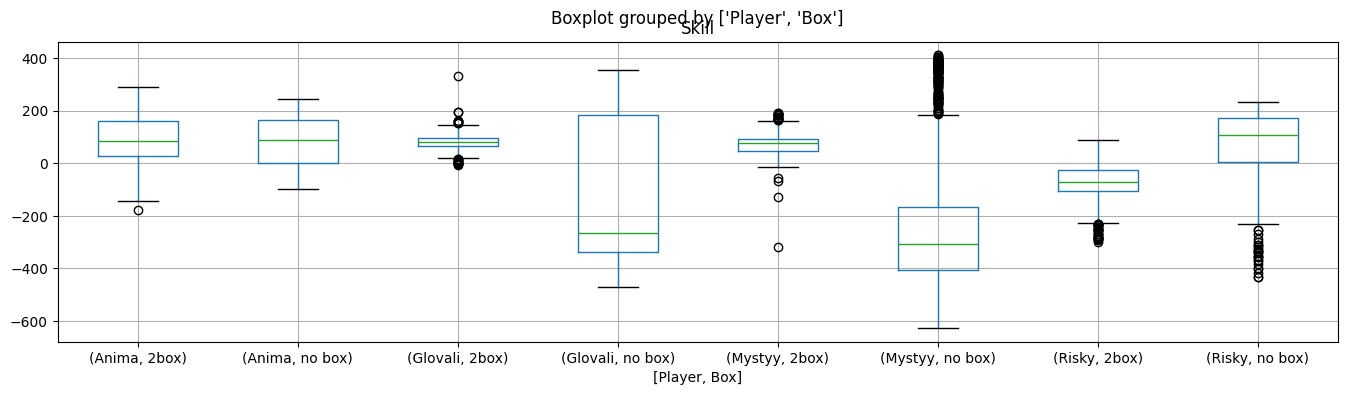

In [49]:
dfc = dfa[dfa['Game Name'] == ' Call of Duty: Black Ops 6']
dfc['Box'] = "2box"
dfc.loc[(dfc['UTC Timestamp'] > '2024-12-04 00:00:00'), 'Box'] = "no box"

fig = plt.figure(figsize=(16, 4))
ax = fig.gca()
dfc.boxplot(ax = ax, column='Skill', by=['Player', 'Box'])

<Axes: title={'center': 'Kills'}, xlabel='[Game Type, Player]'>

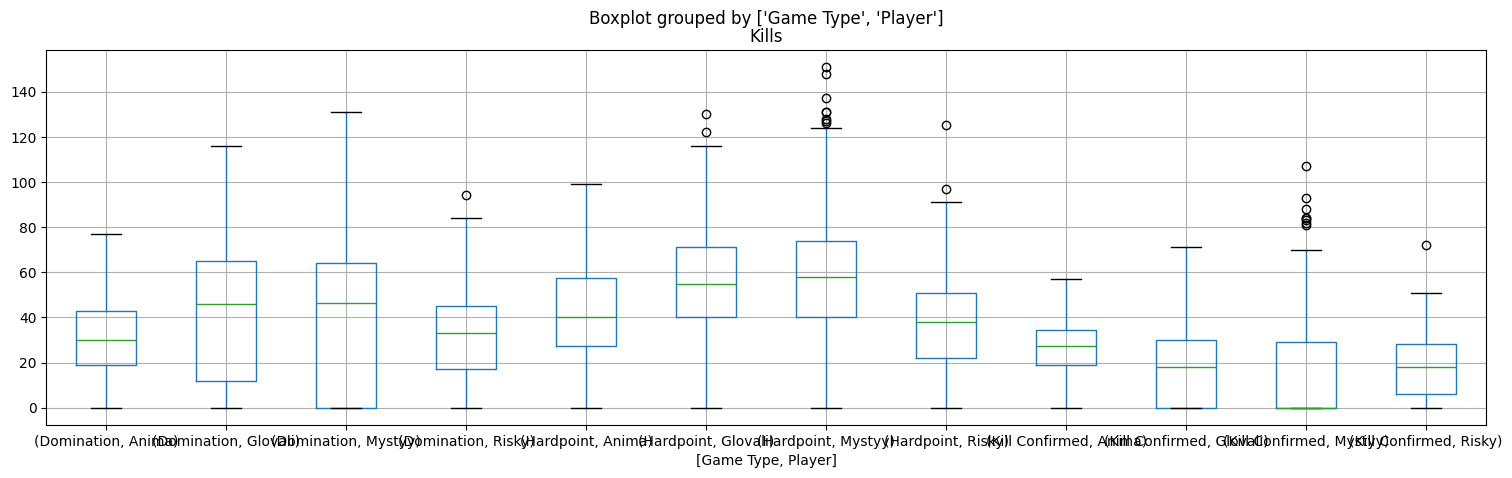

In [50]:
fig = plt.figure(figsize=(18, 5))
gamemodes = ['Domination', 'Hardpoint', 'Kill Confirmed']
dfc[dfc['Game Type'].isin(gamemodes)].boxplot(ax = fig.gca(), column='Kills', by=['Game Type', 'Player'])

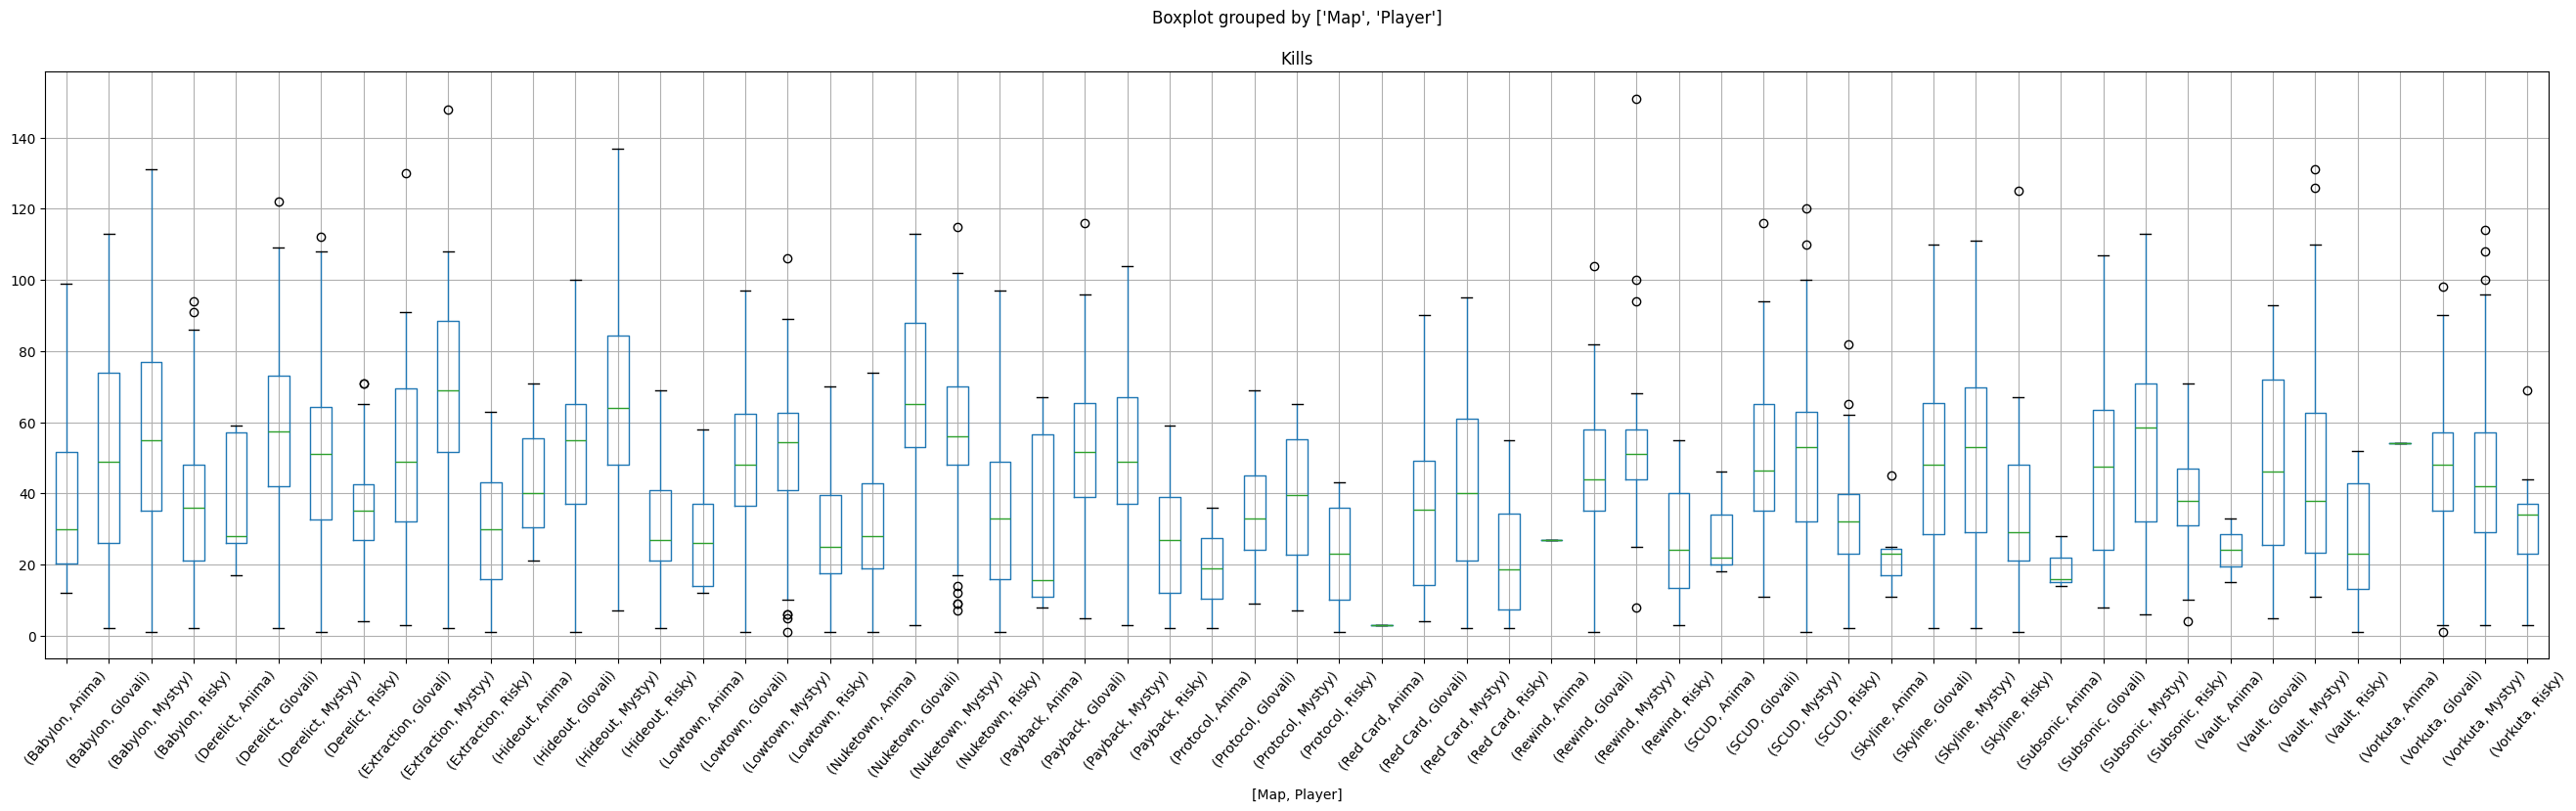

In [51]:
fig = plt.figure(figsize=(32, 8))
maps = ['Babylon', 'Derelict', 'Extraction', 'Hideout', 'Lowtown', 'Nuketown', 'Payback', 'Protocol', 'Red Card', 'Rewind', 'SCUD', 'Skyline', 'Subsonic', 'Vault', 'Vorkuta']
dfc[(dfc['Kills'] > 0) & (dfc['Map'].isin(maps))].boxplot(ax = fig.gca(), column='Kills', by=['Map', 'Player'])
plt.xticks(rotation=50);

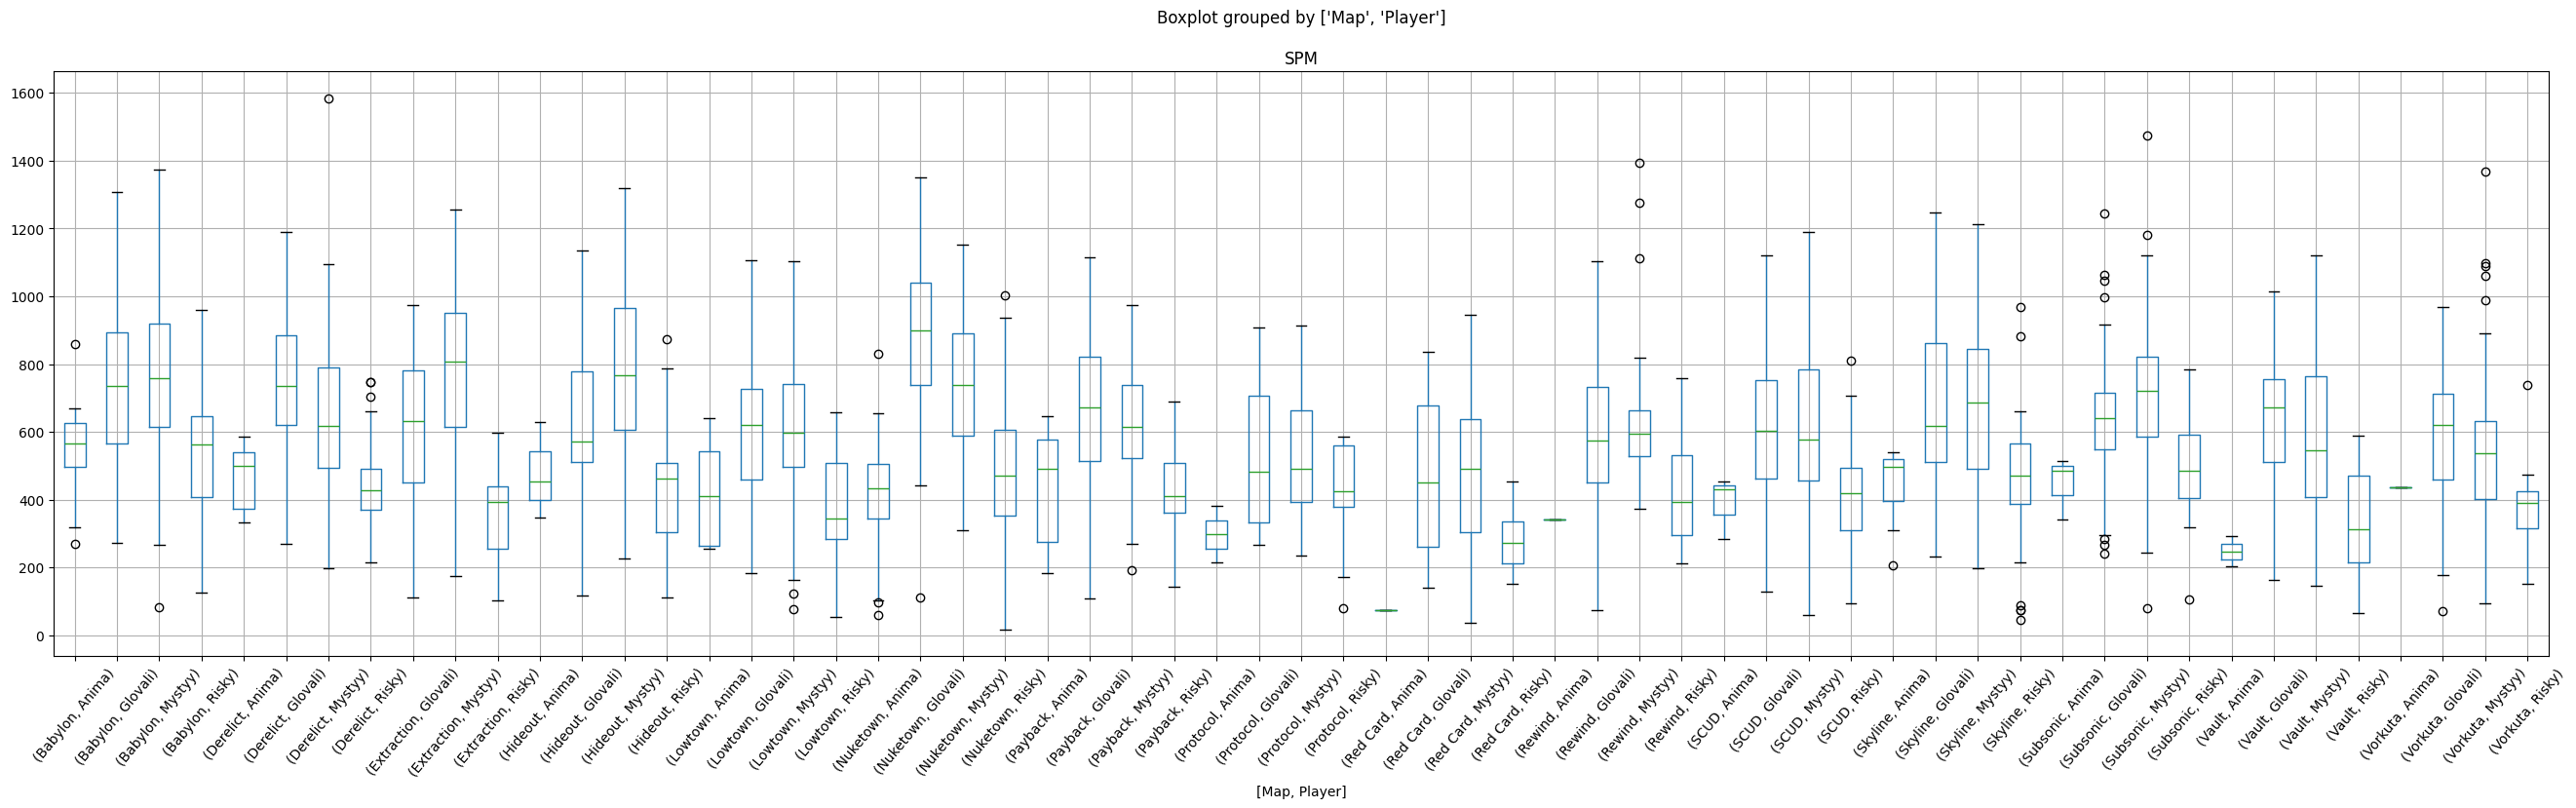

In [52]:
fig = plt.figure(figsize=(32, 8))
dfc[(dfc['Kills'] > 0) & (dfc['Map'].isin(maps))].boxplot(ax = fig.gca(), column='SPM', by=['Map', 'Player'])
plt.xticks(rotation=50);

In [53]:
kkk = dfa[dfa['Kills'] > 300]
kkk.T

198    \
Player                                         Anima   
Match ID                                         NaN   
Game Name               Call of Duty: Modern Warfare   
UTC Timestamp                    2019-11-24 20:53:24   
Kills                                            310   
Deaths                                           194   
Game Type                                        NaN   
Match Start Timestamp                            NaT   
Match End Timestamp                              NaT   
Map                                              NaN   
Match Outcome                                    NaN   
Skill                                            NaN   
Score                                            310   
Shots                                            NaN   
Hits                                             NaN   
Assists                                           11   
Longest Streak                                     1   
Headshots                                         30   
Damage Done                                      NaN   
Match XP                                         NaN   
SPM                                             -0.0   
Accuracy                                         NaN   

                                               618    \
Player                                         Anima   
Match ID                                         NaN   
Game Name               Call of Duty: Modern Warfare   
UTC Timestamp                    2020-03-23 06:26:33   
Kills                                            468   
Deaths                                           165   
Game Type                                        NaN   
Match Start Timestamp                            NaT   
Match End Timestamp                              NaT   
Map                                              NaN   
Match Outcome                                    NaN   
Skill                                            NaN   
Score                                          58625   
Shots                                            NaN   
Hits                                             NaN   
Assists                                            2   
Longest Streak                                     1   
Headshots                                         99   
Damage Done                                      NaN   
Match XP                                         NaN   
SPM                                             -0.0   
Accuracy                                         NaN   

                                               619                      12099  \
Player                                         Anima                    Anima   
Match ID                                         NaN                      NaN   
Game Name               Call of Duty: Modern Warfare   Call of Duty: Vanguard   
UTC Timestamp                    2020-03-24 11:05:27      2023-10-06 18:24:40   
Kills                                            443                      404   
Deaths                                            91                       54   
Game Type                                        NaN                Hardpoint   
Match Start Timestamp                            NaT                      NaT   
Match End Timestamp                              NaT                      NaT   
Map                                              NaN                 Das Haus   
Match Outcome                                    NaN                     loss   
Skill                                            NaN                   -300.0   
Score                                          55975                    50540   
Shots                                            NaN                   4368.0   
Hits                                             NaN                   1684.0   
Assists                                            9                        0   
Longest Streak                                     1                        1   
Headshots  

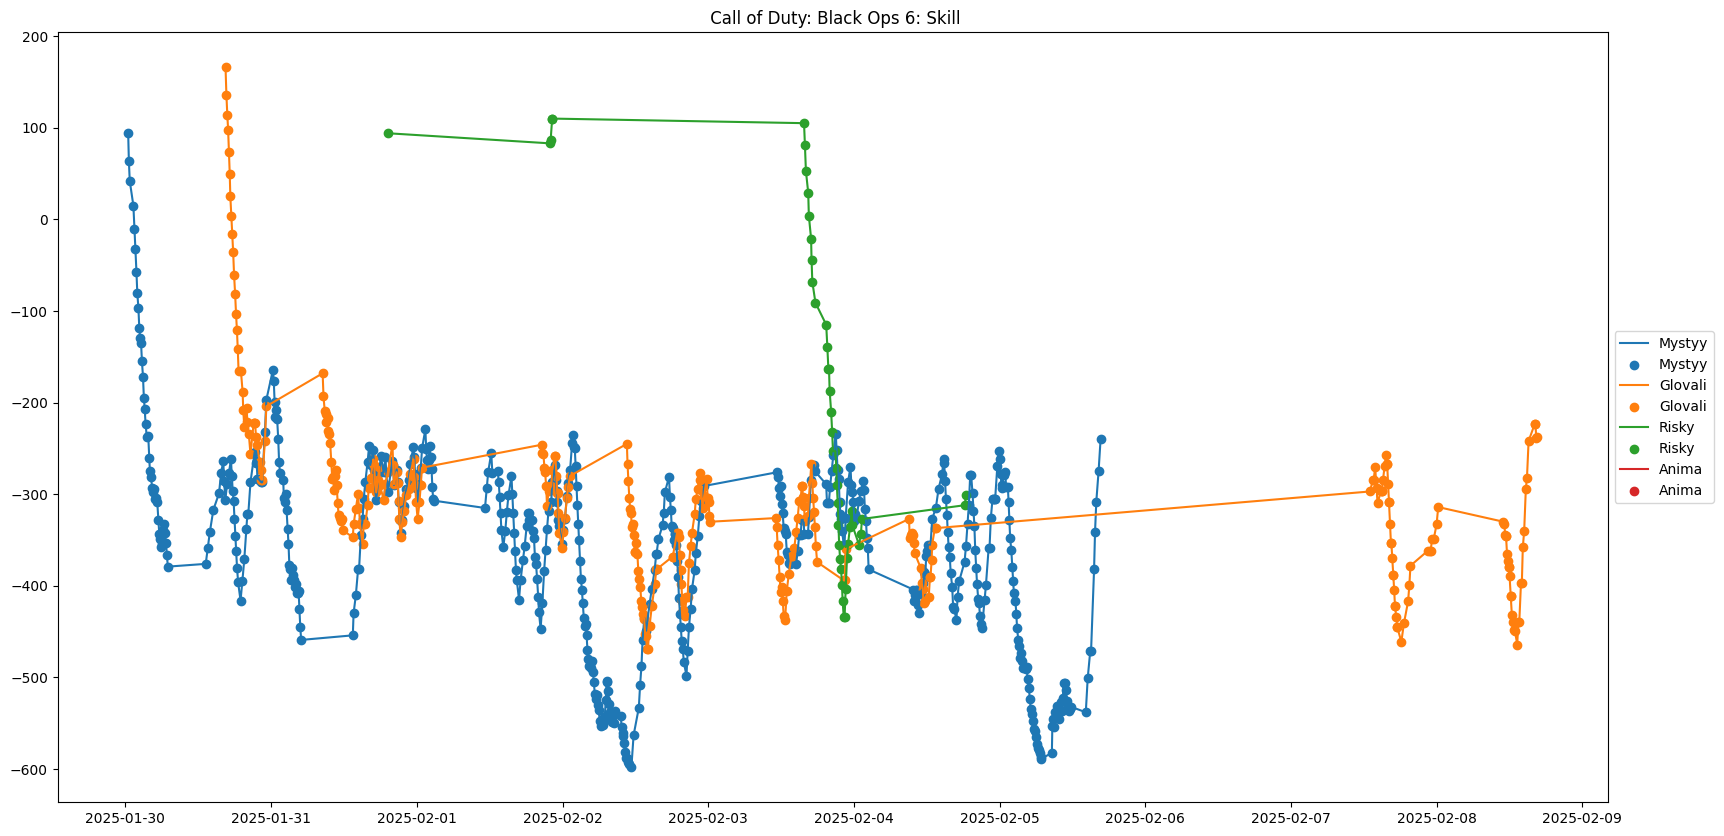

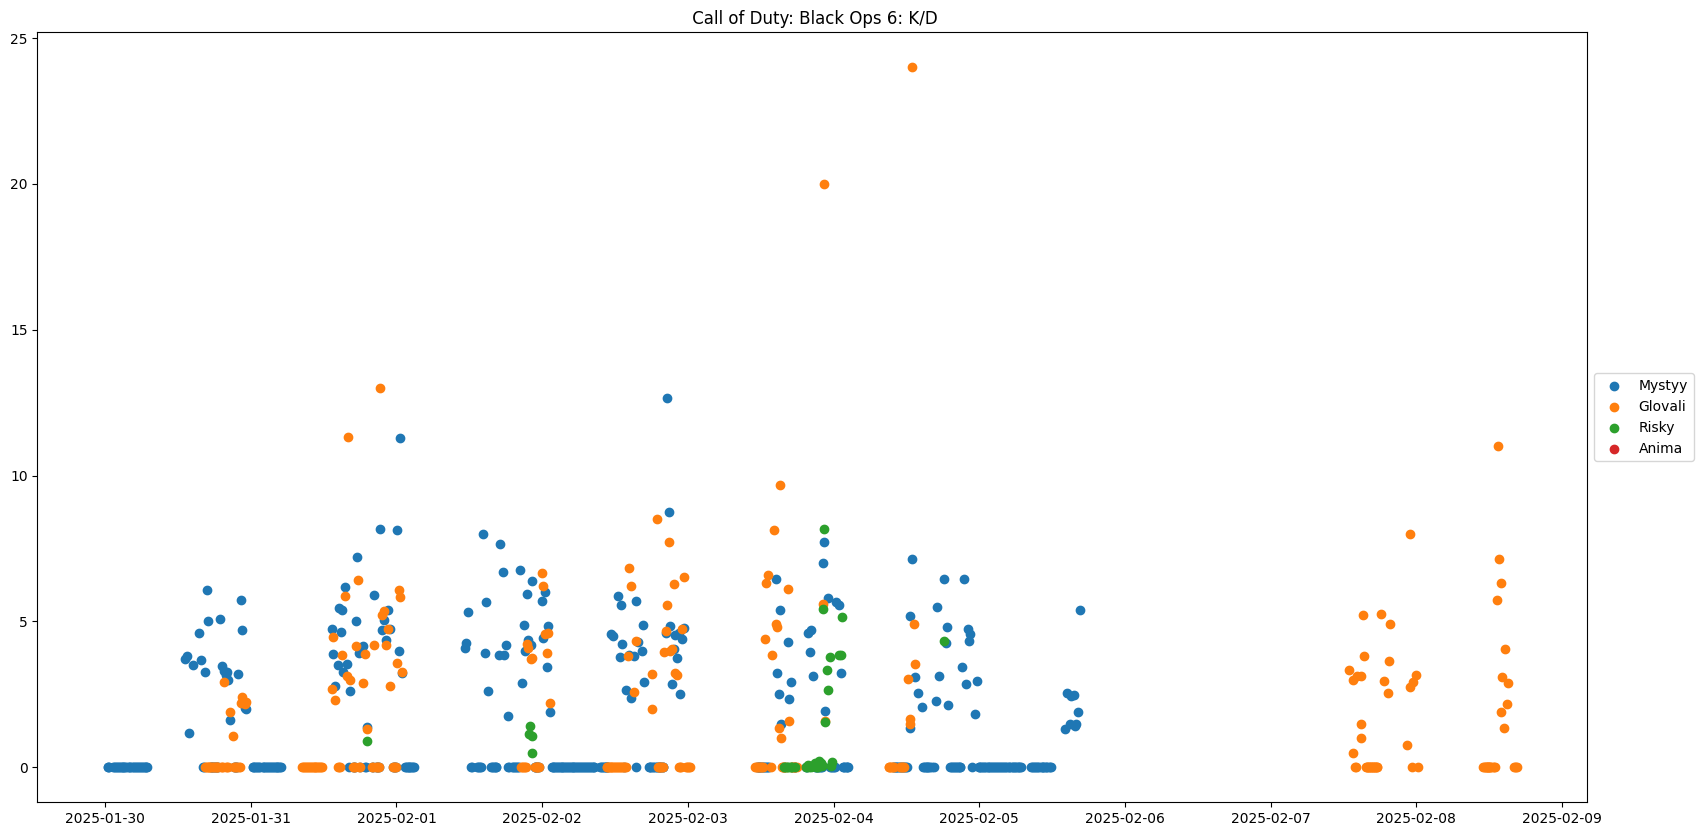

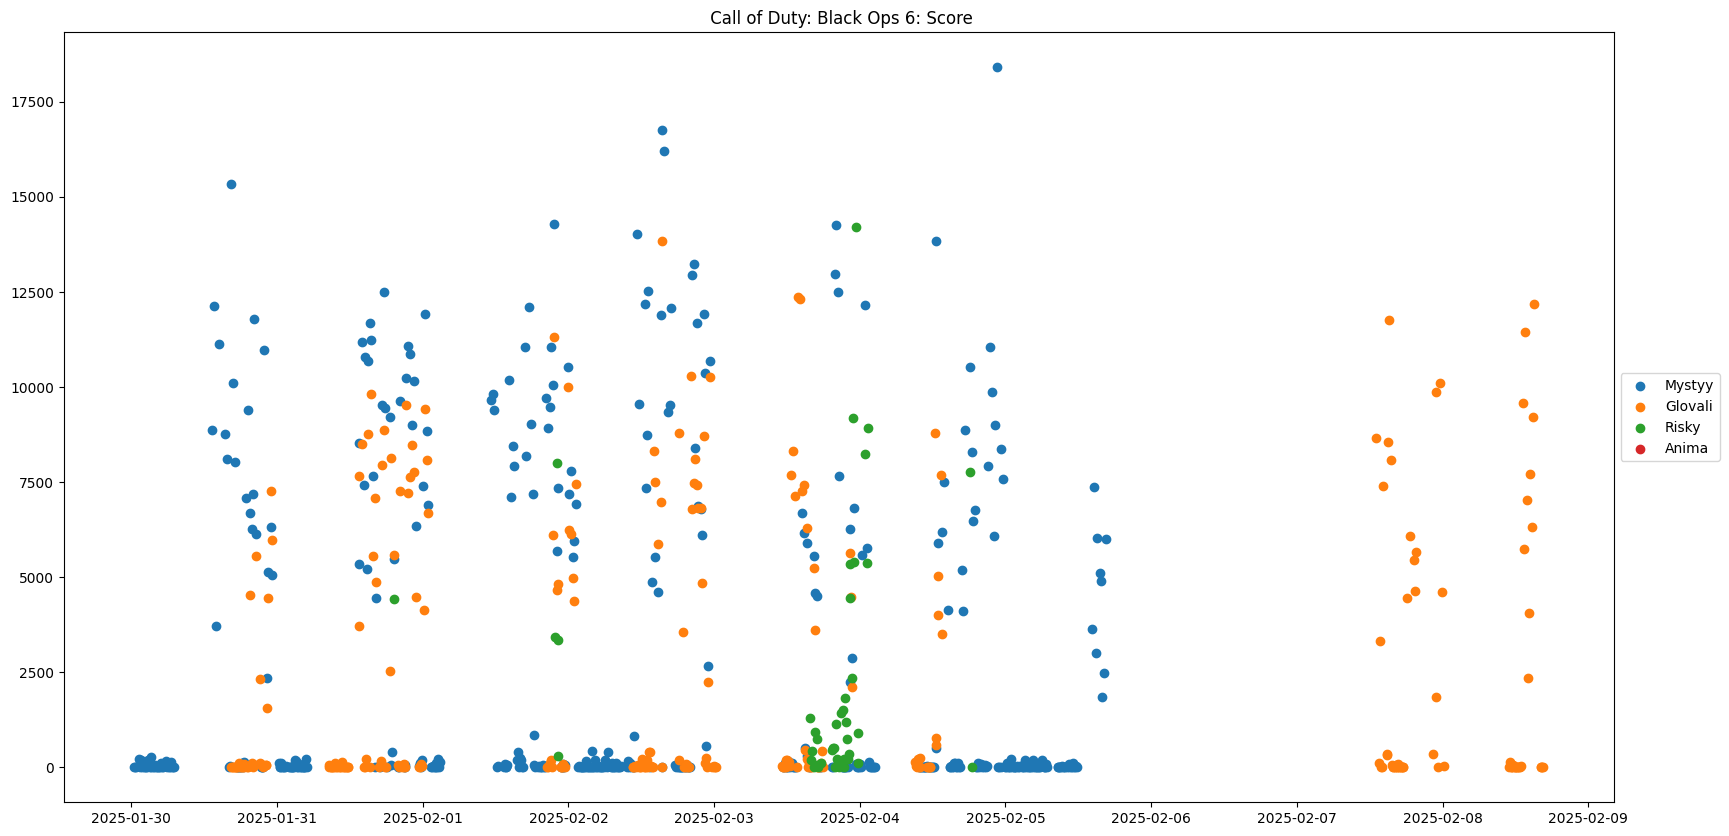

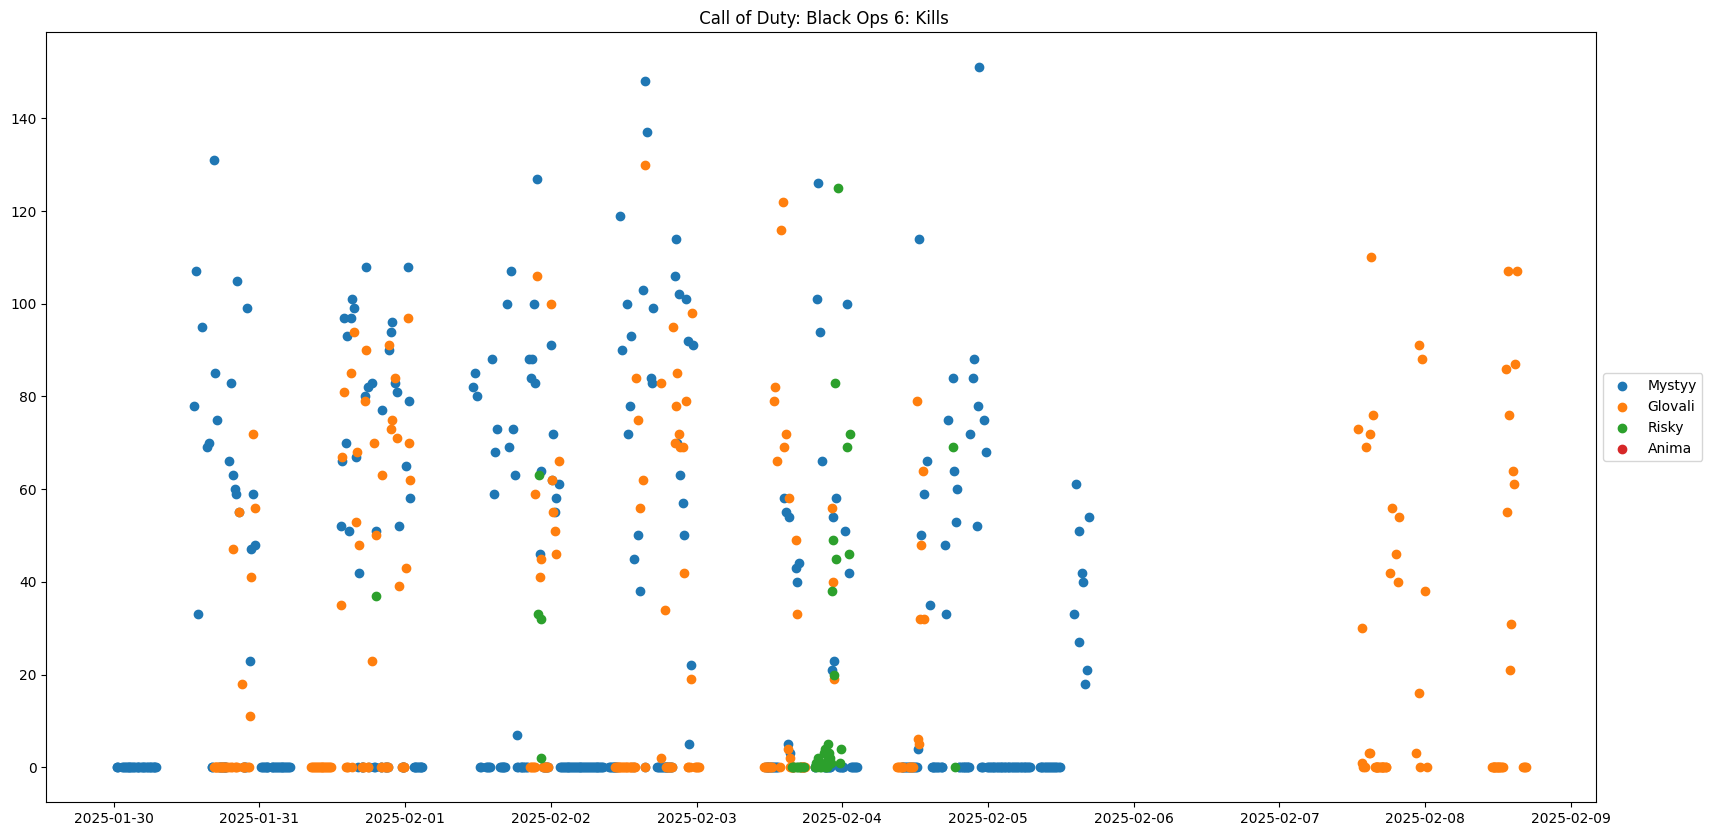

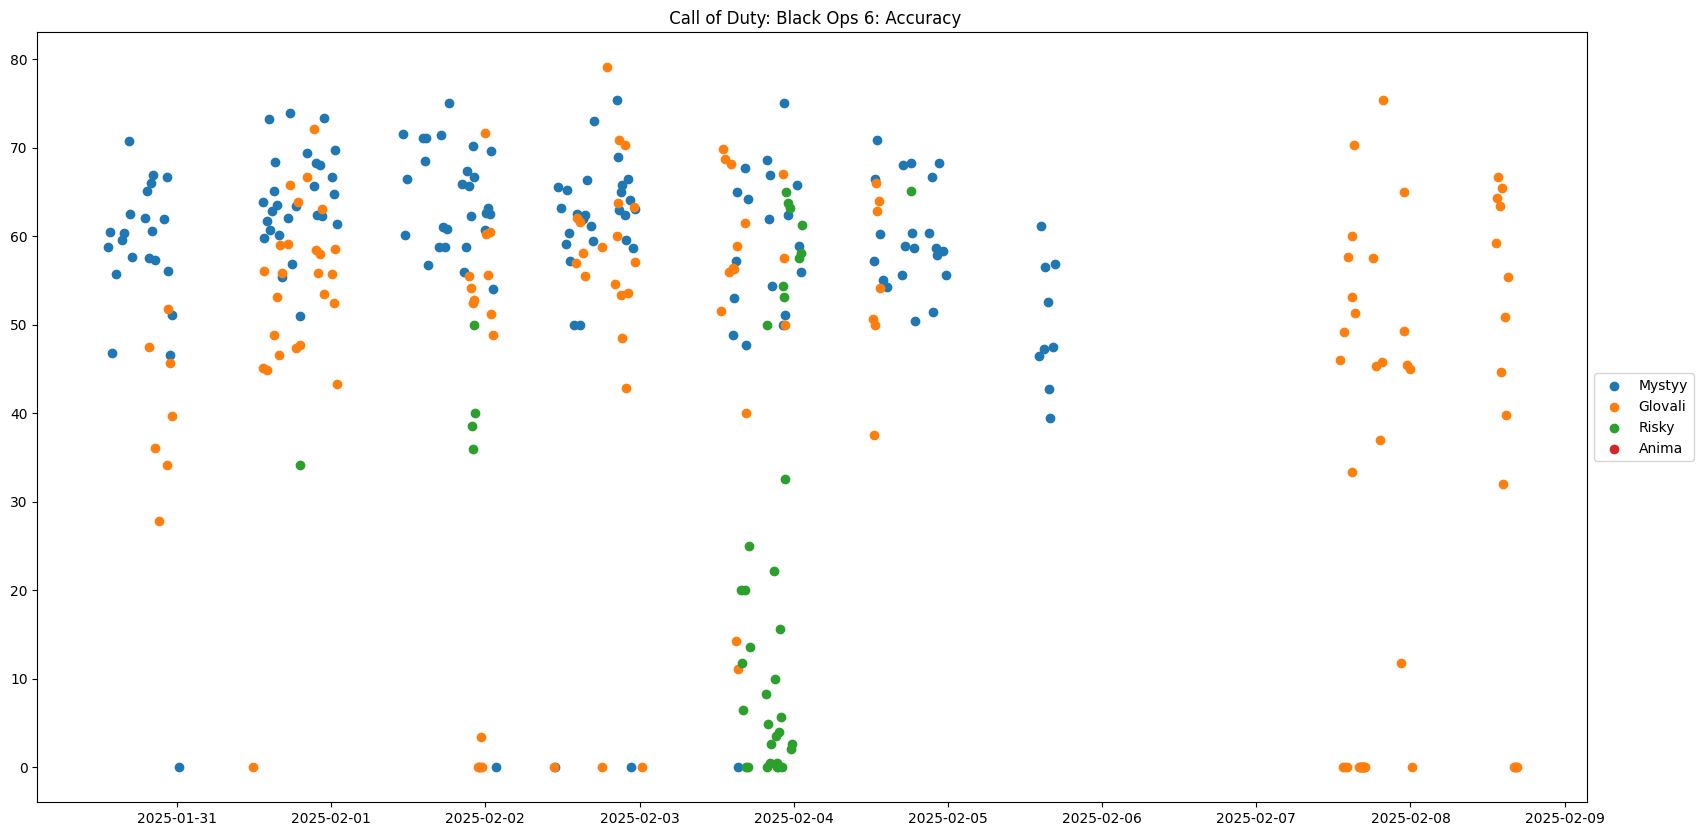

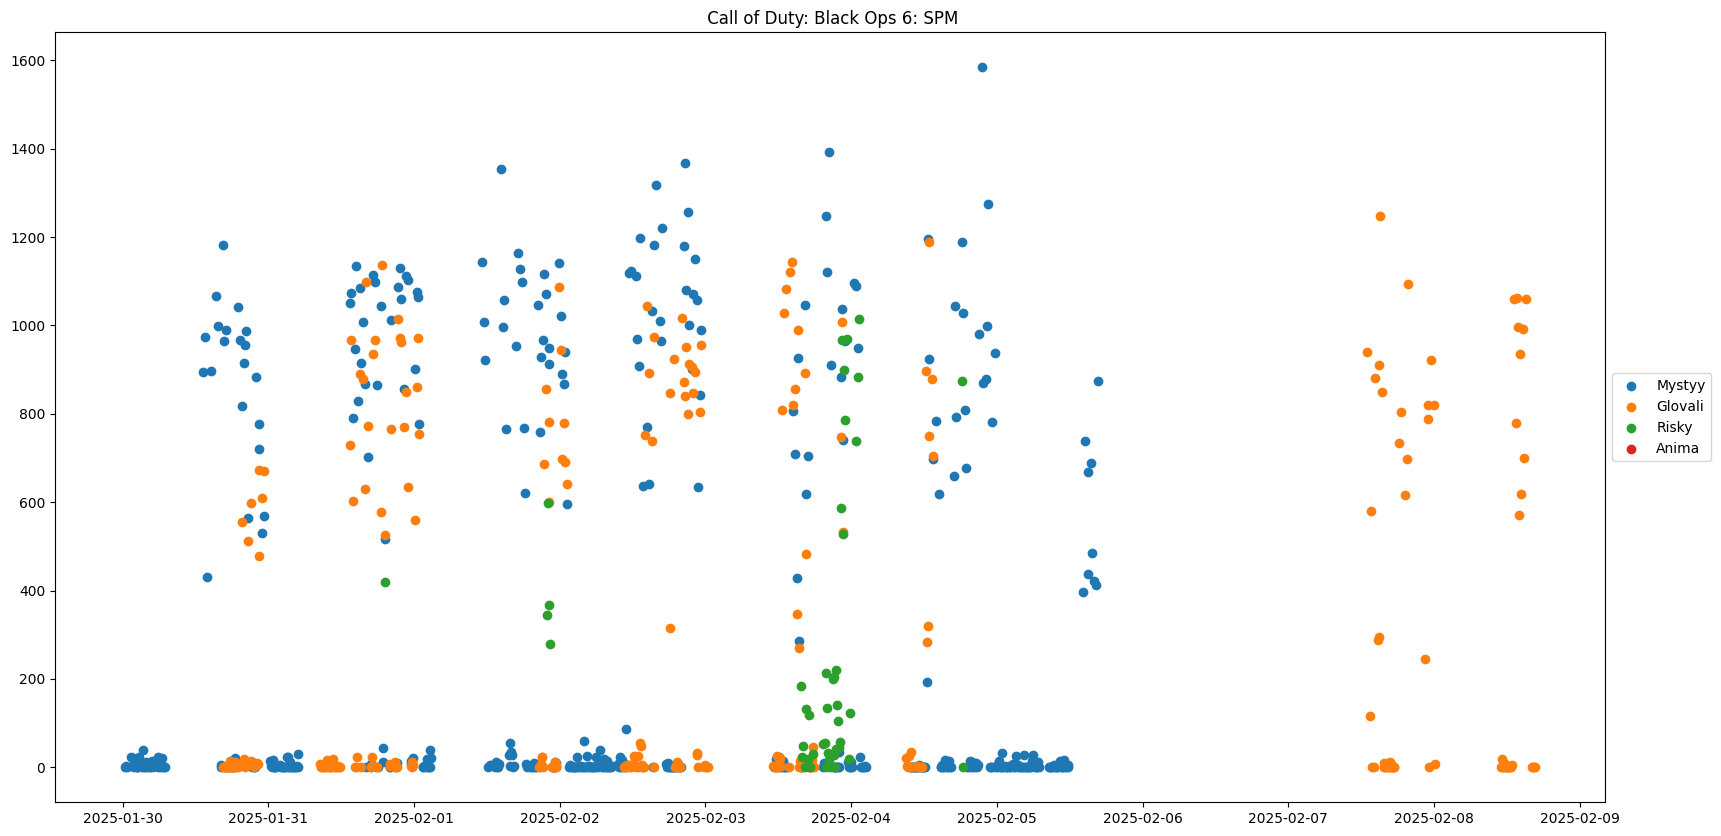

In [54]:
# %matplotlib inline
plot_game(game_name = ' Call of Duty: Black Ops 6', ranged = ['2025-01-30 00:00:00', '2025-02-09 05:00:00'])

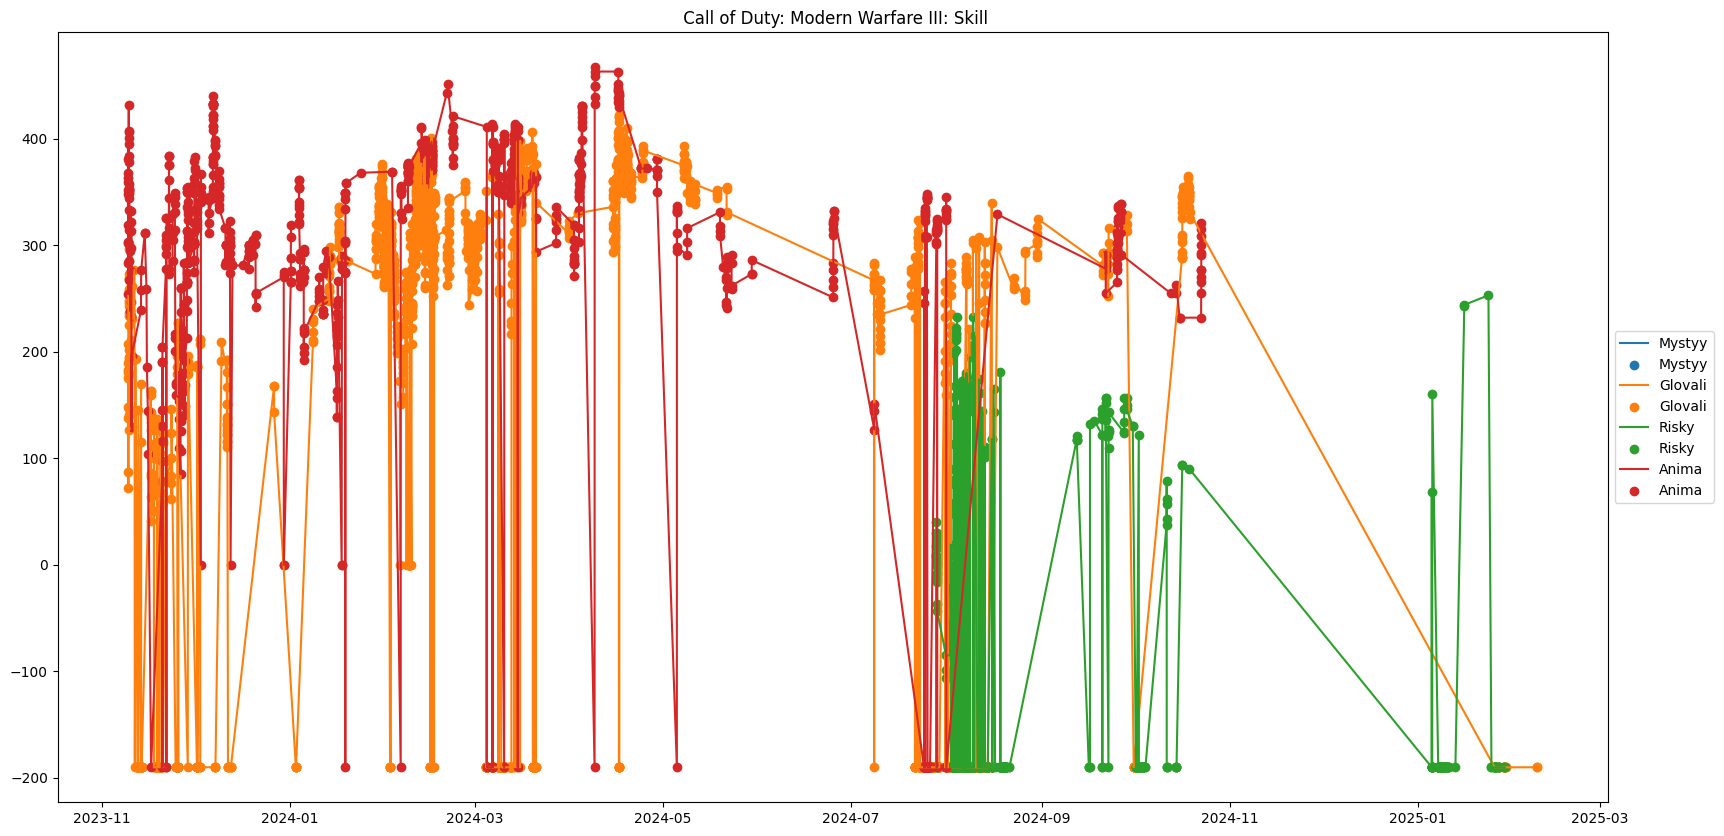

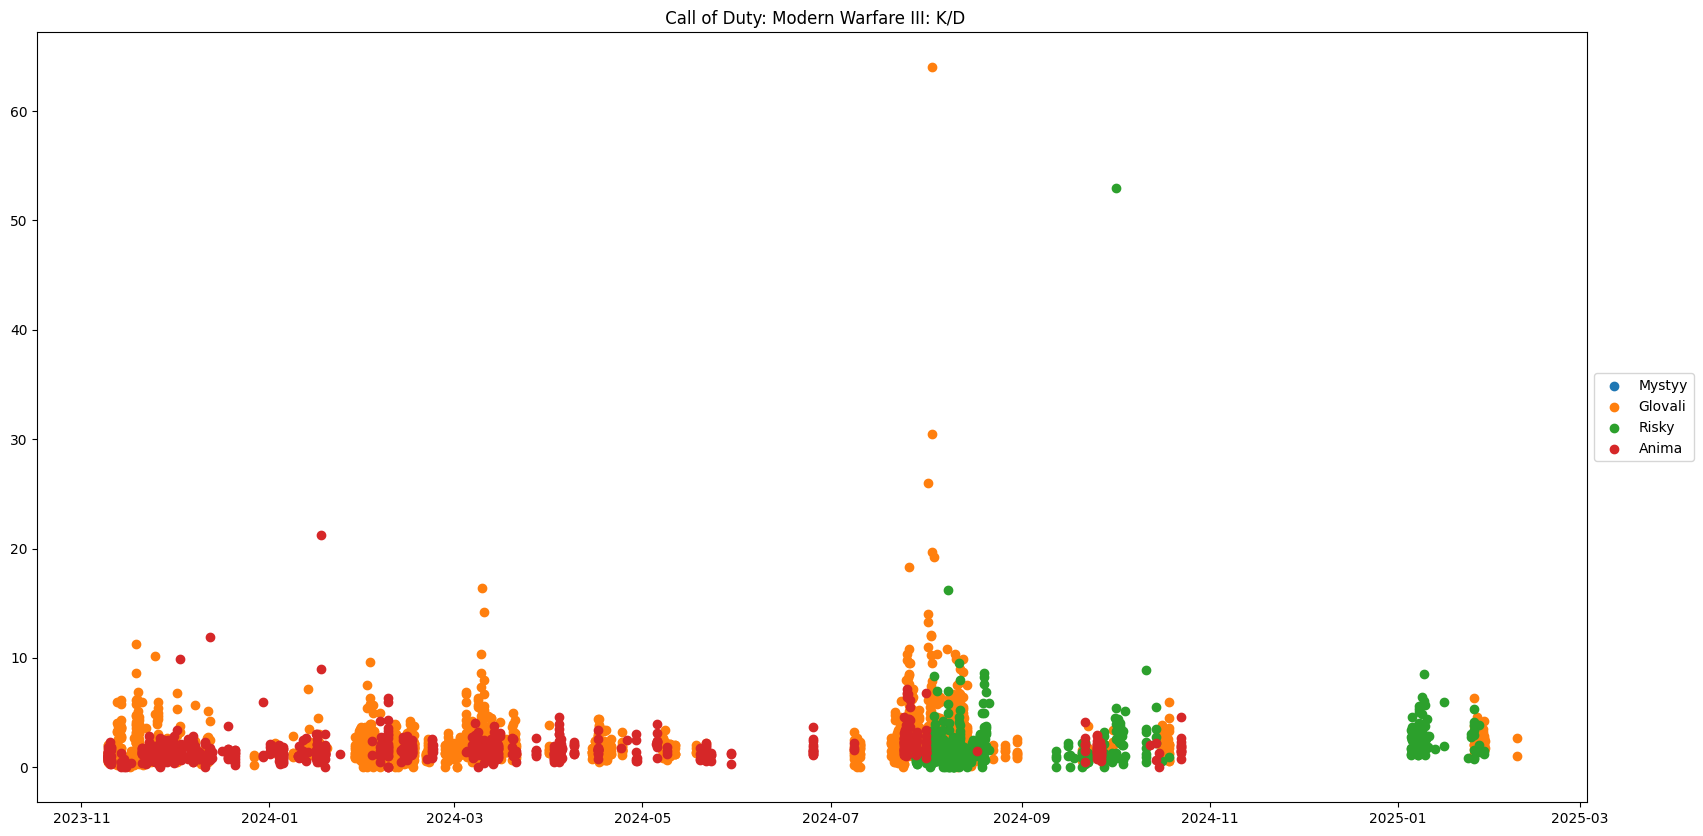

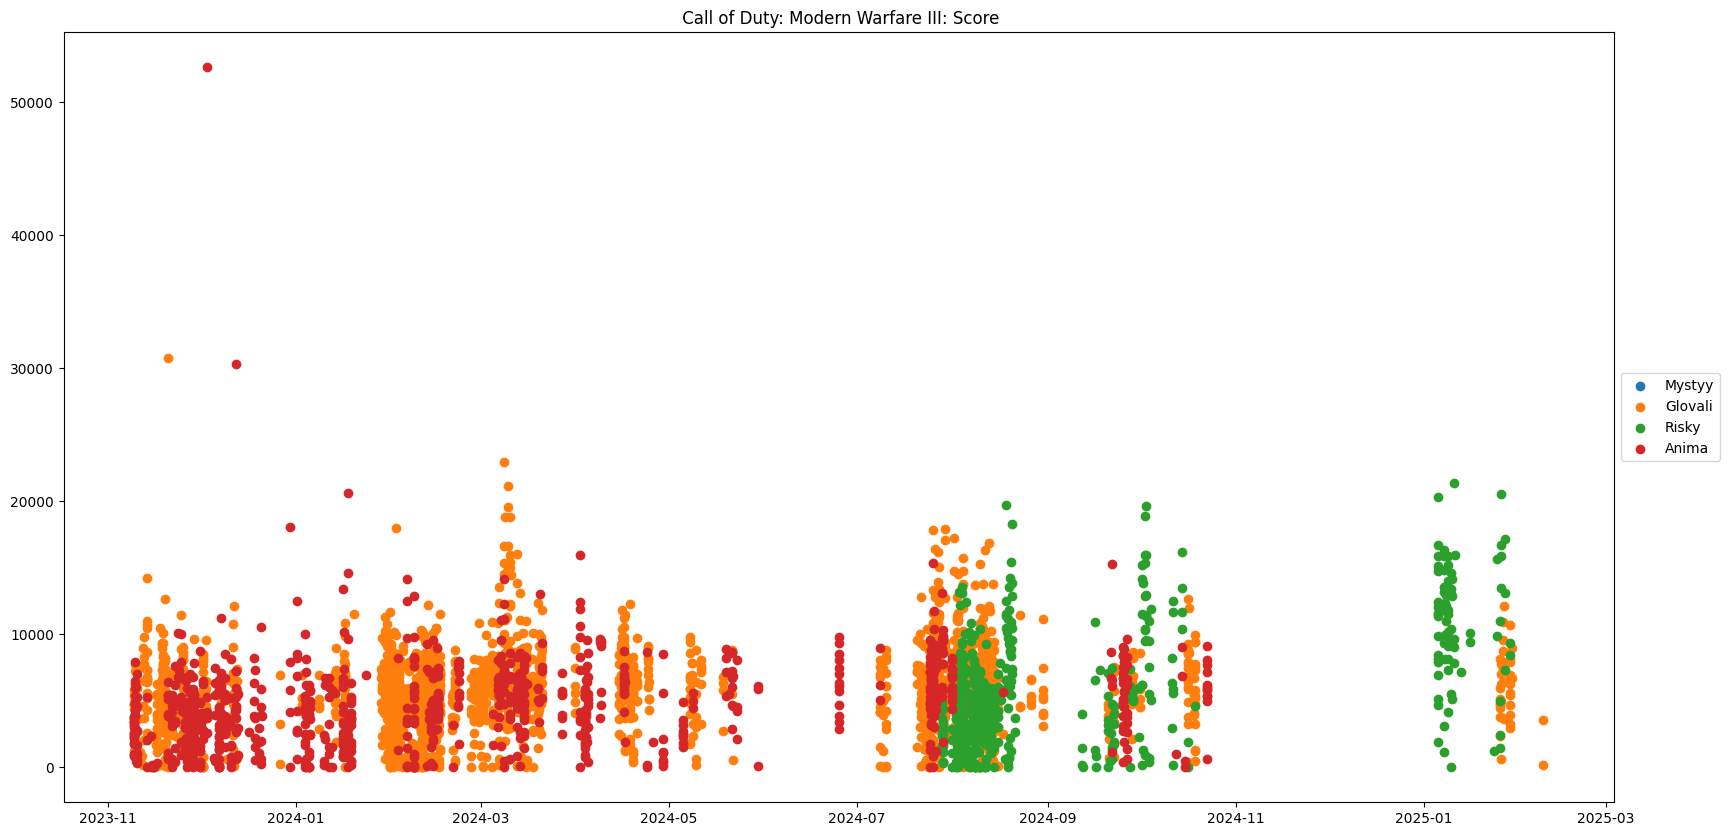

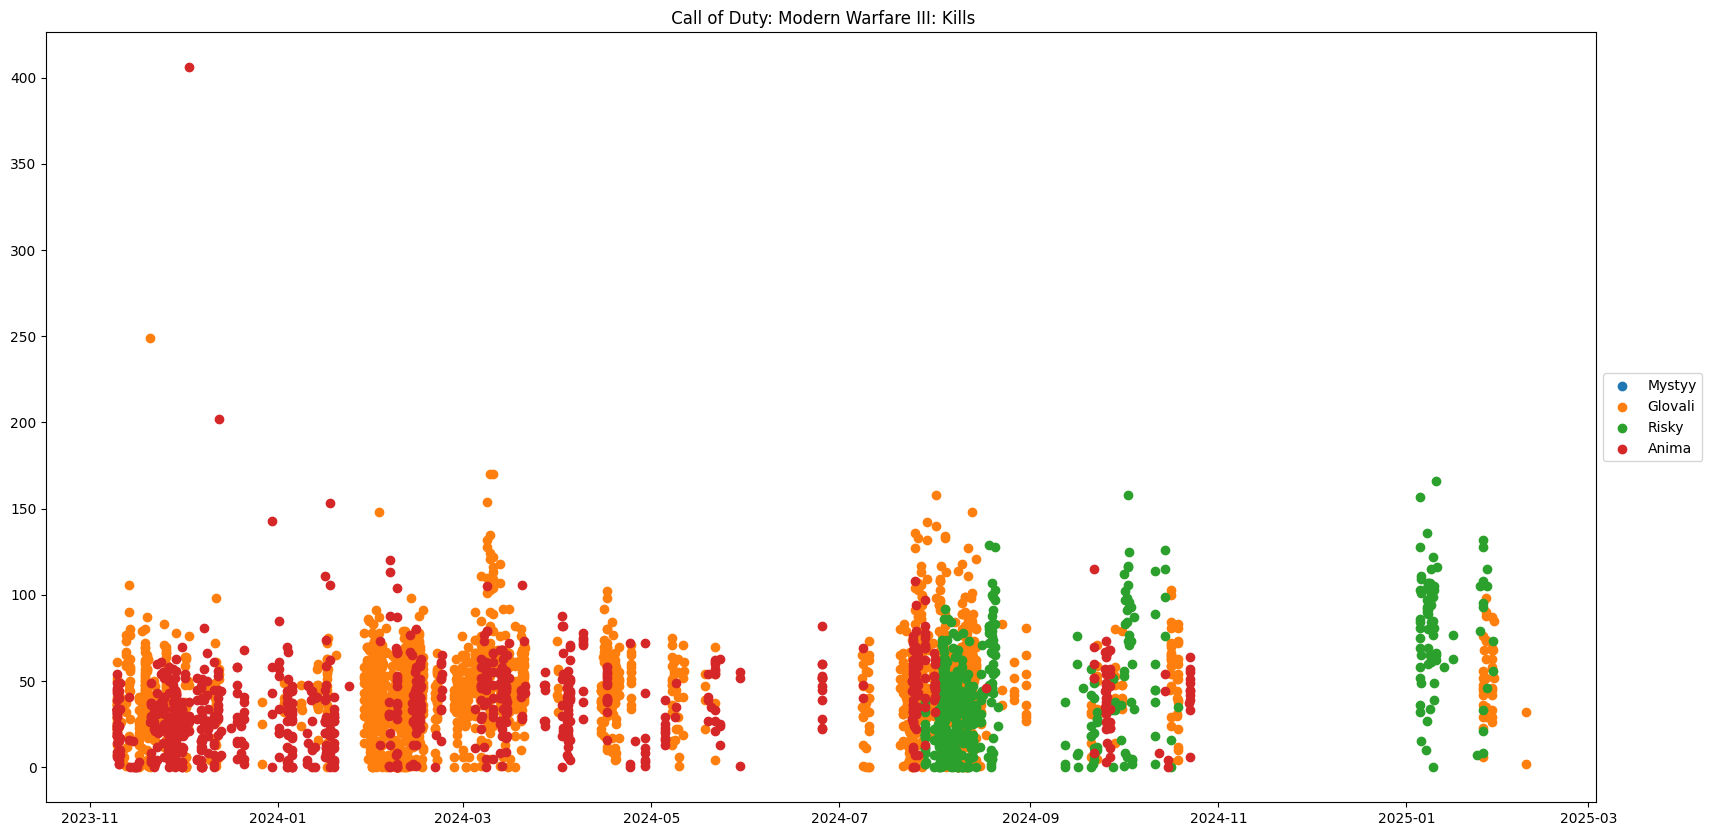

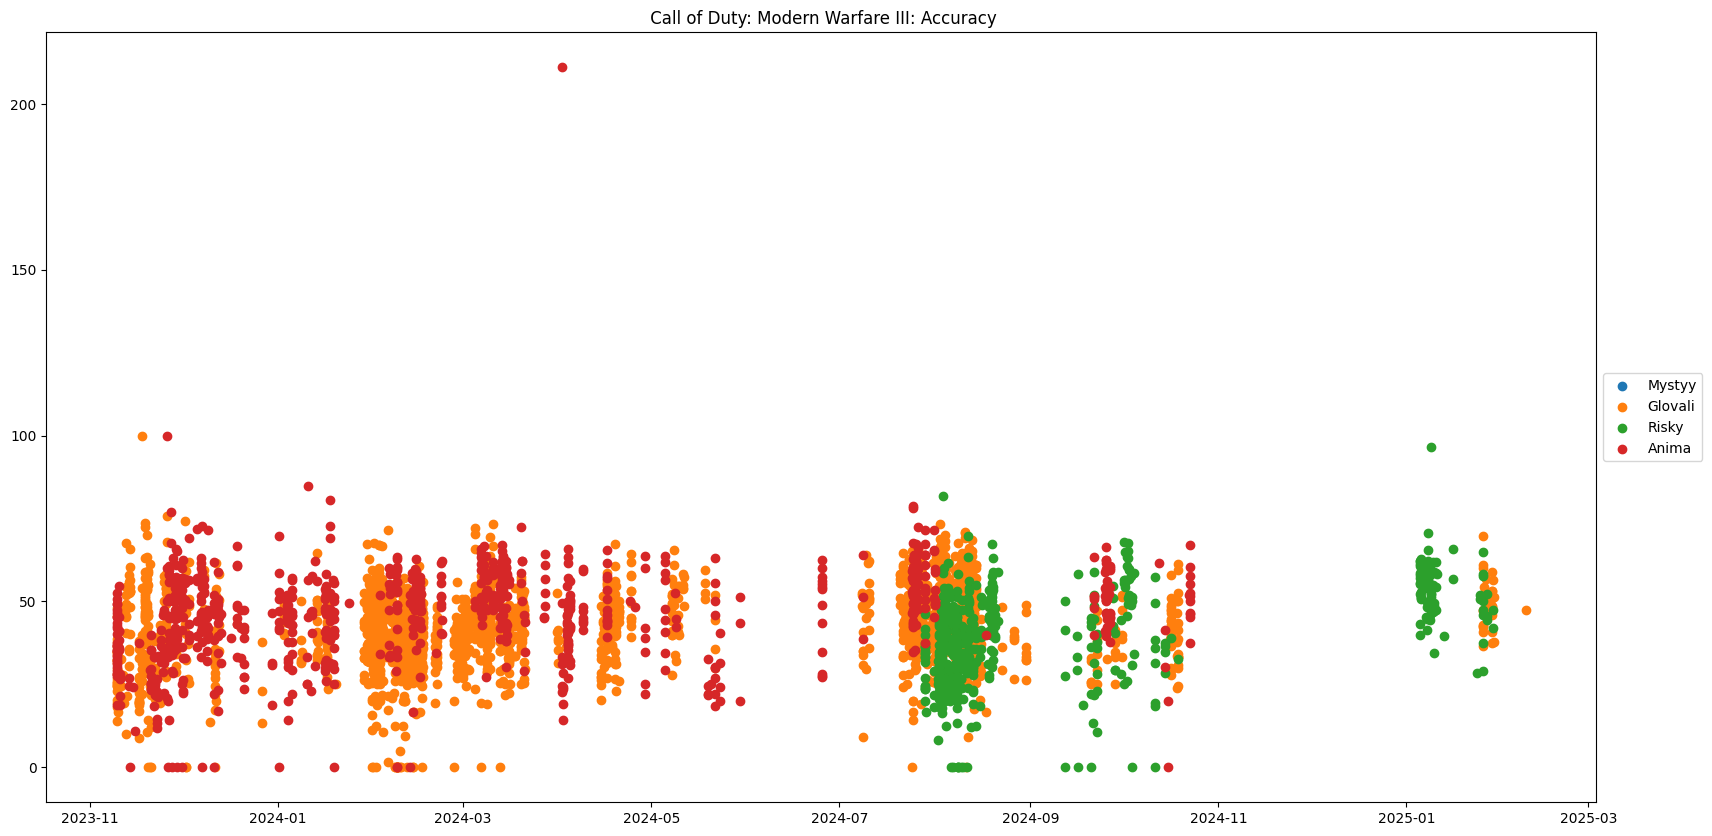

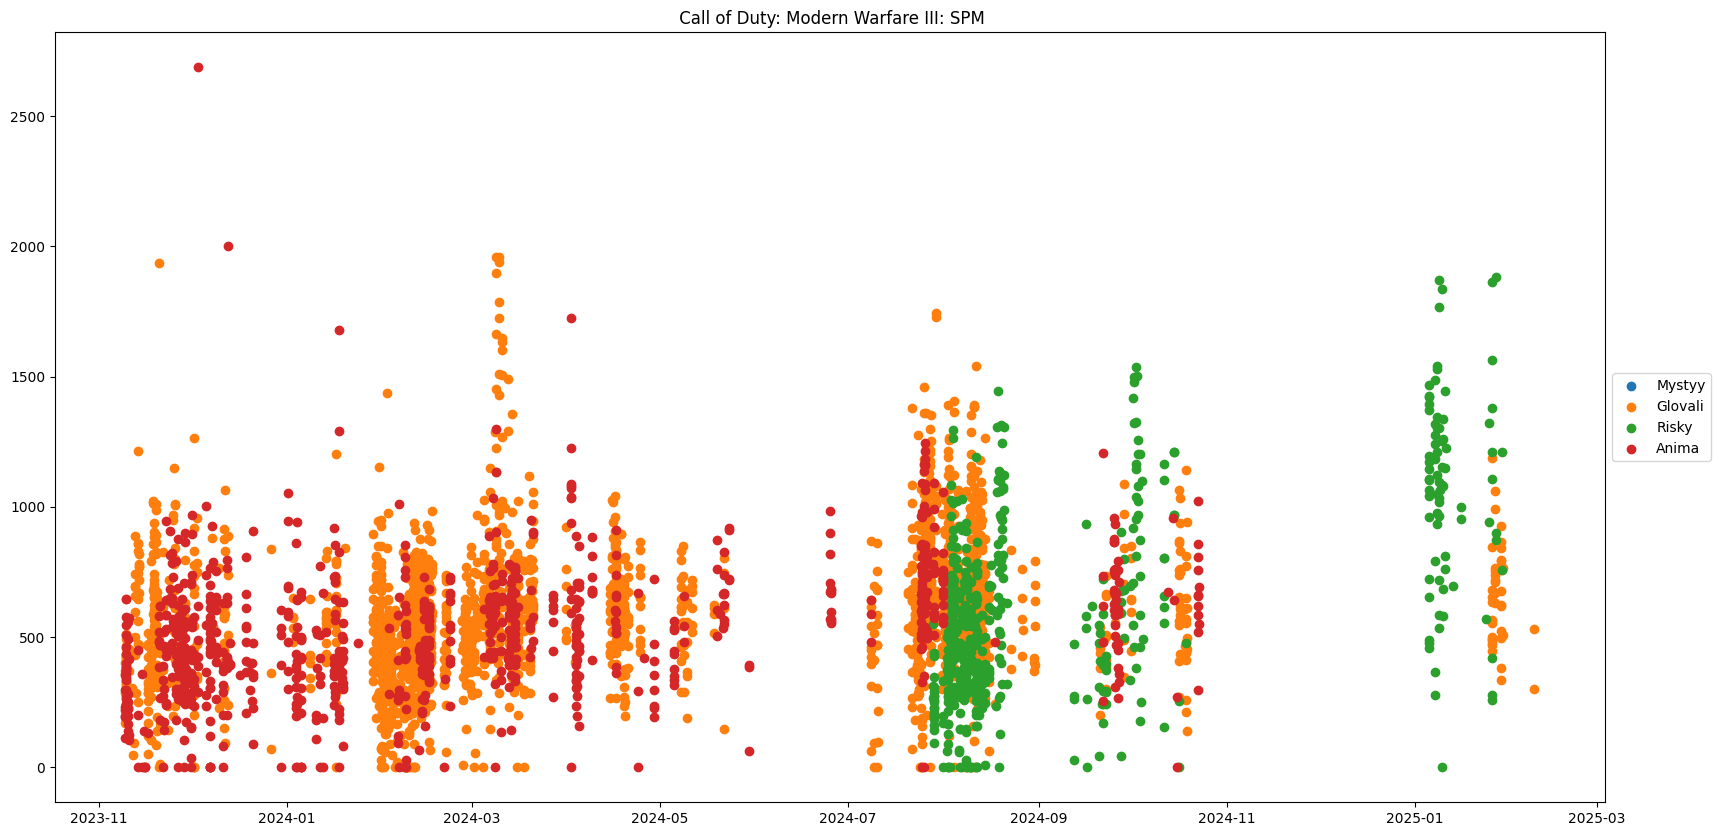

In [12]:
plot_game(game_name = ' Call of Duty: Modern Warfare III')

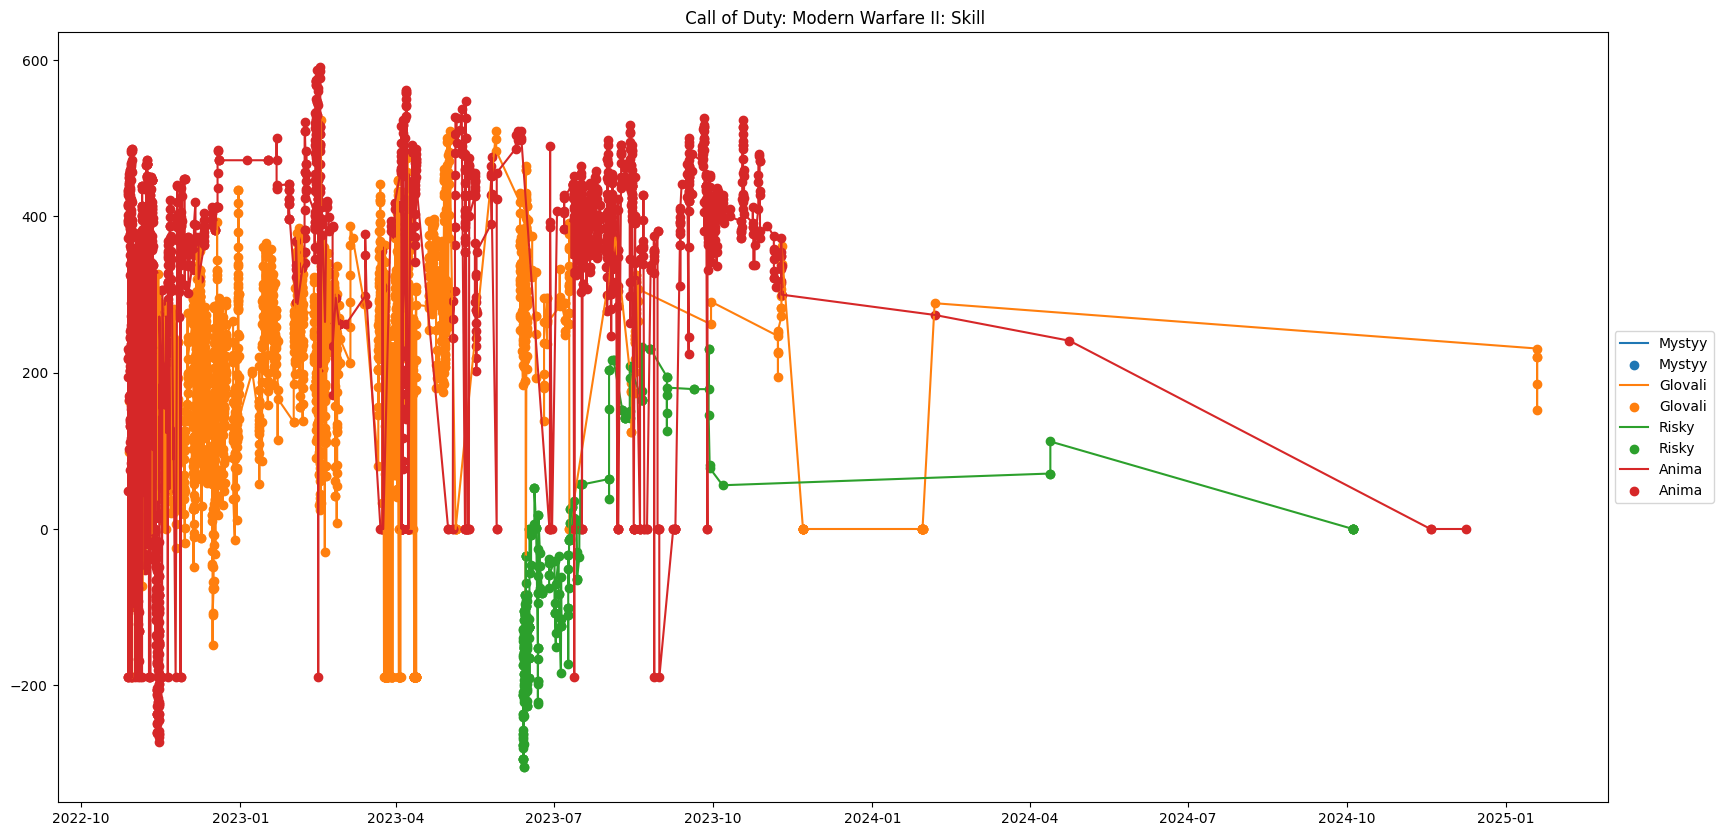

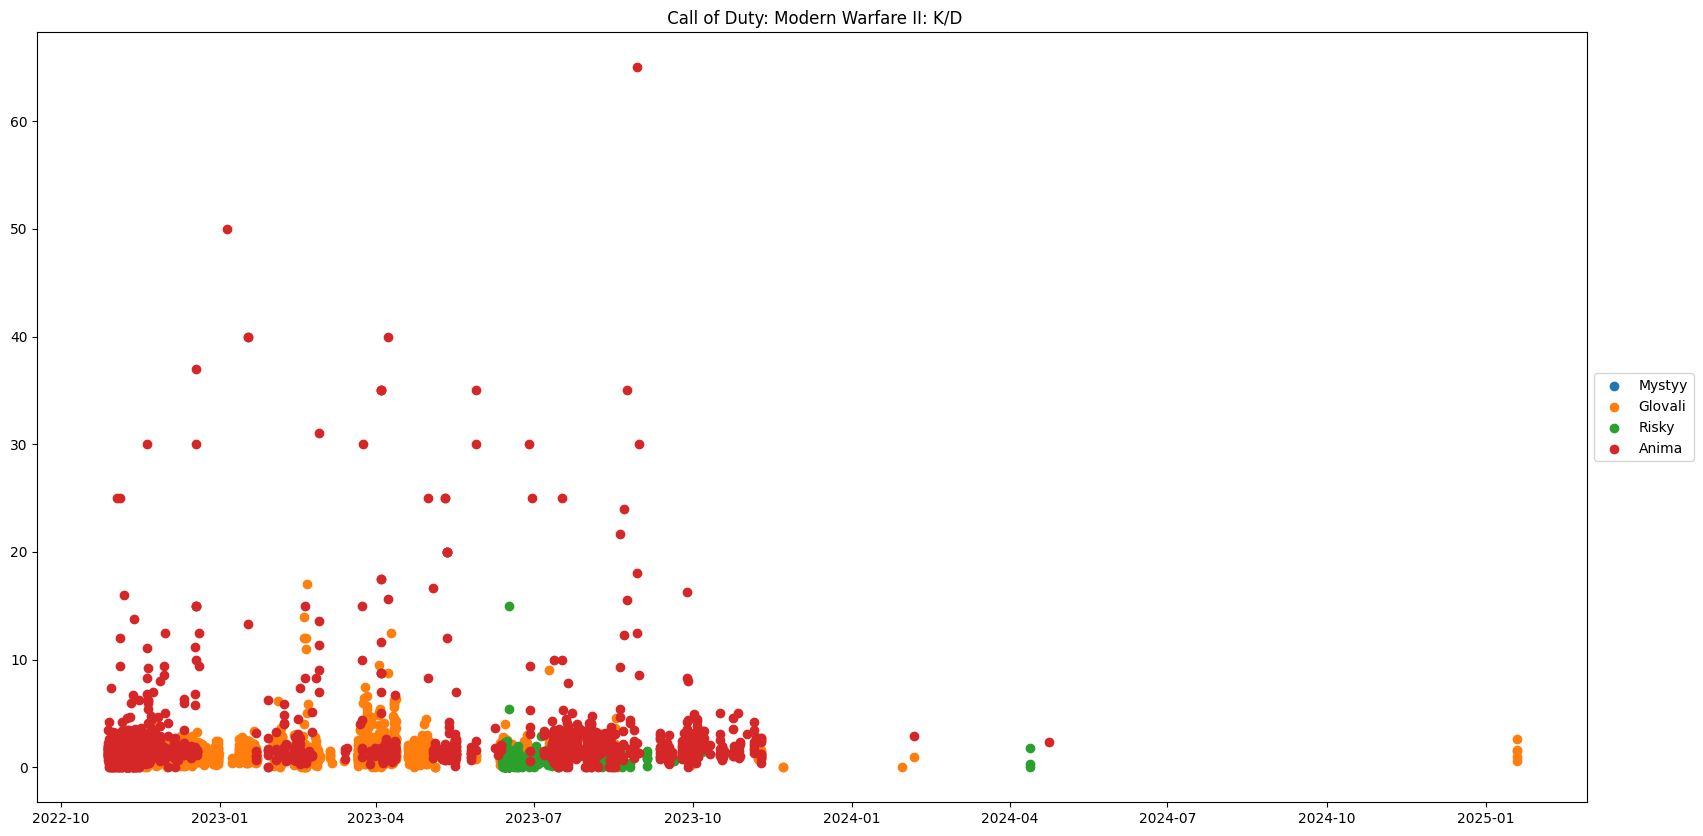

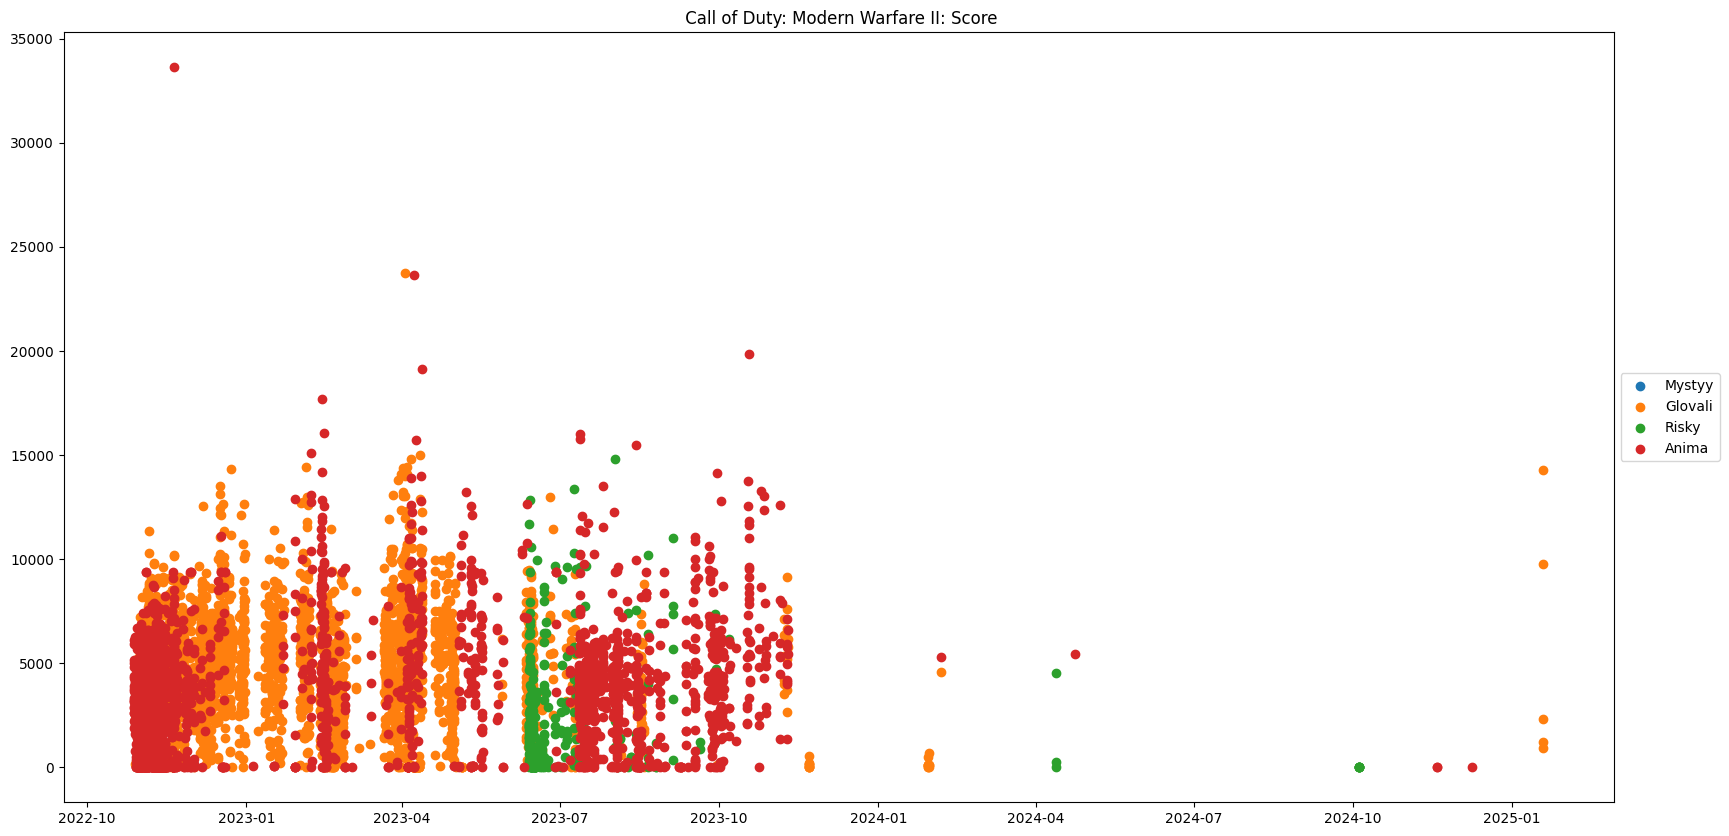

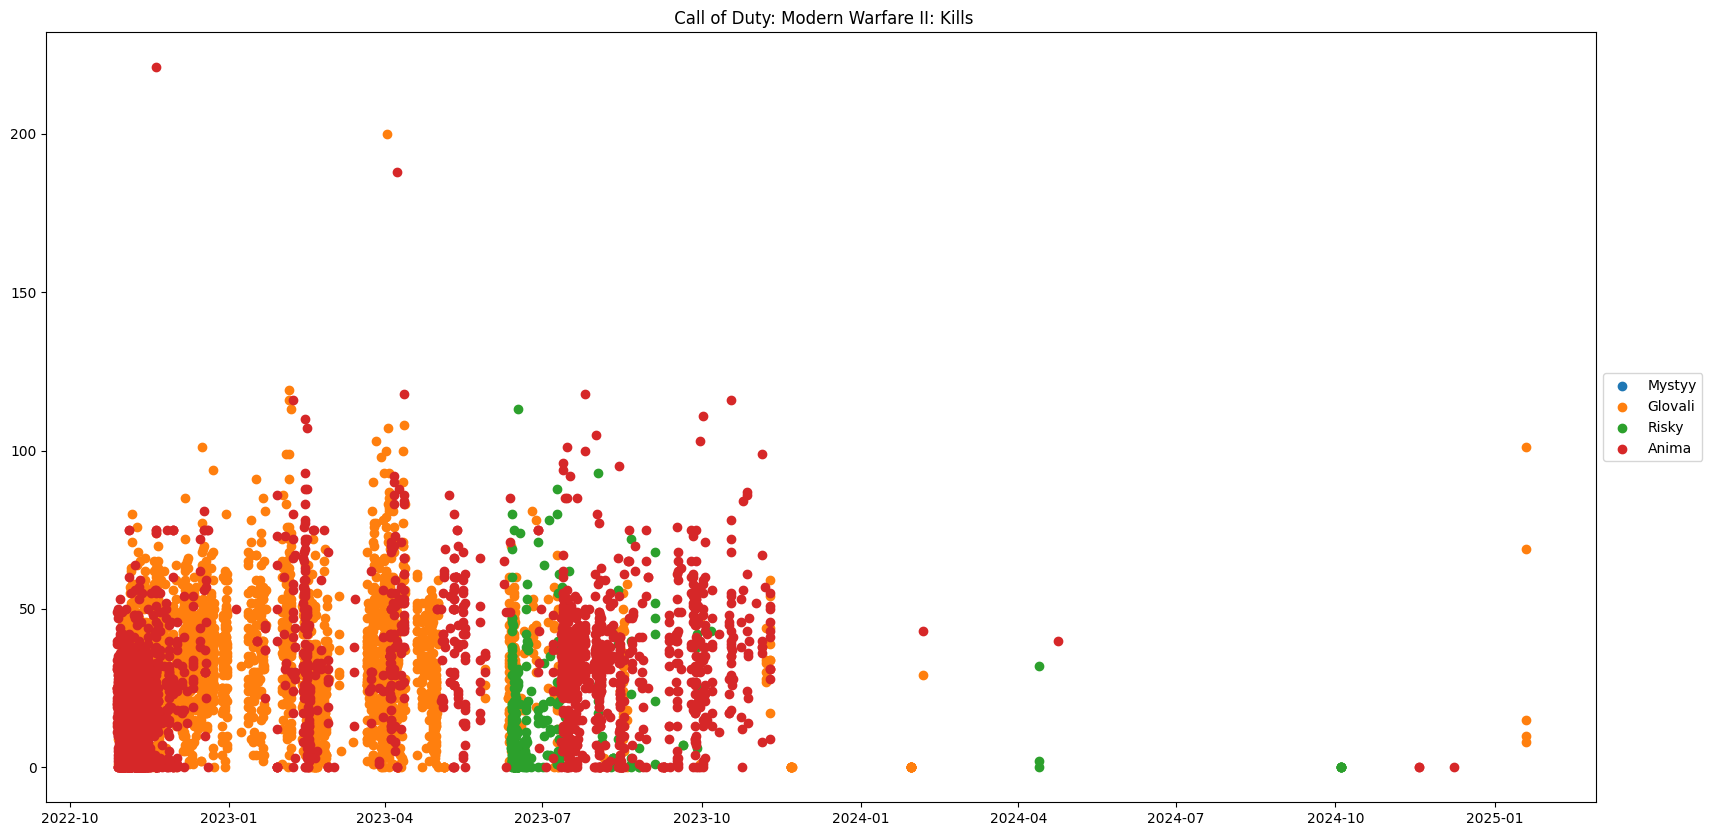

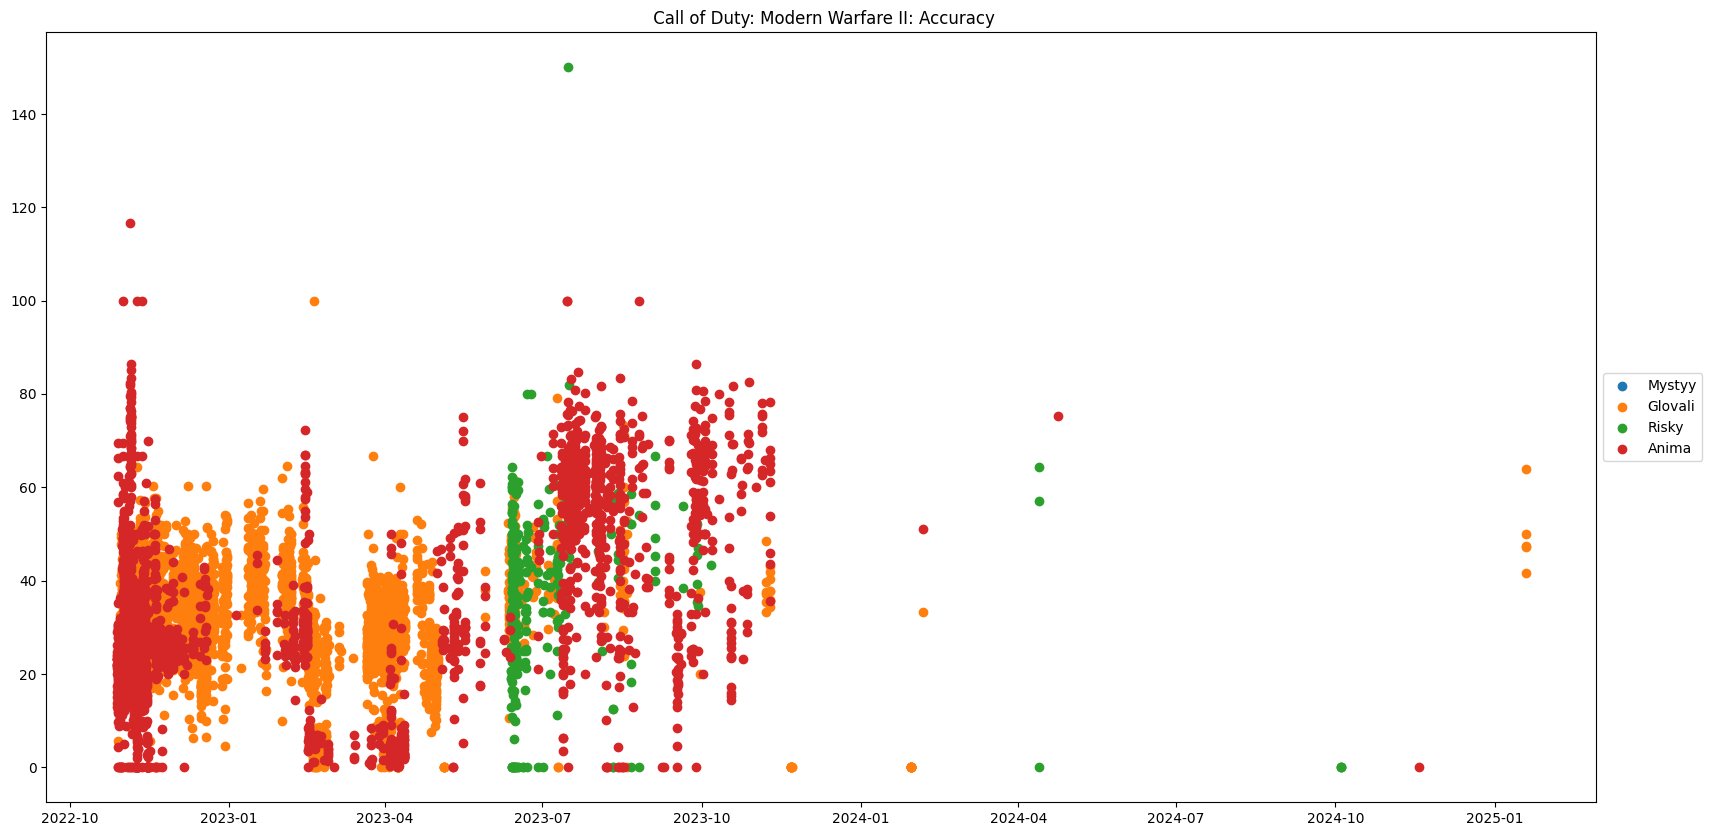

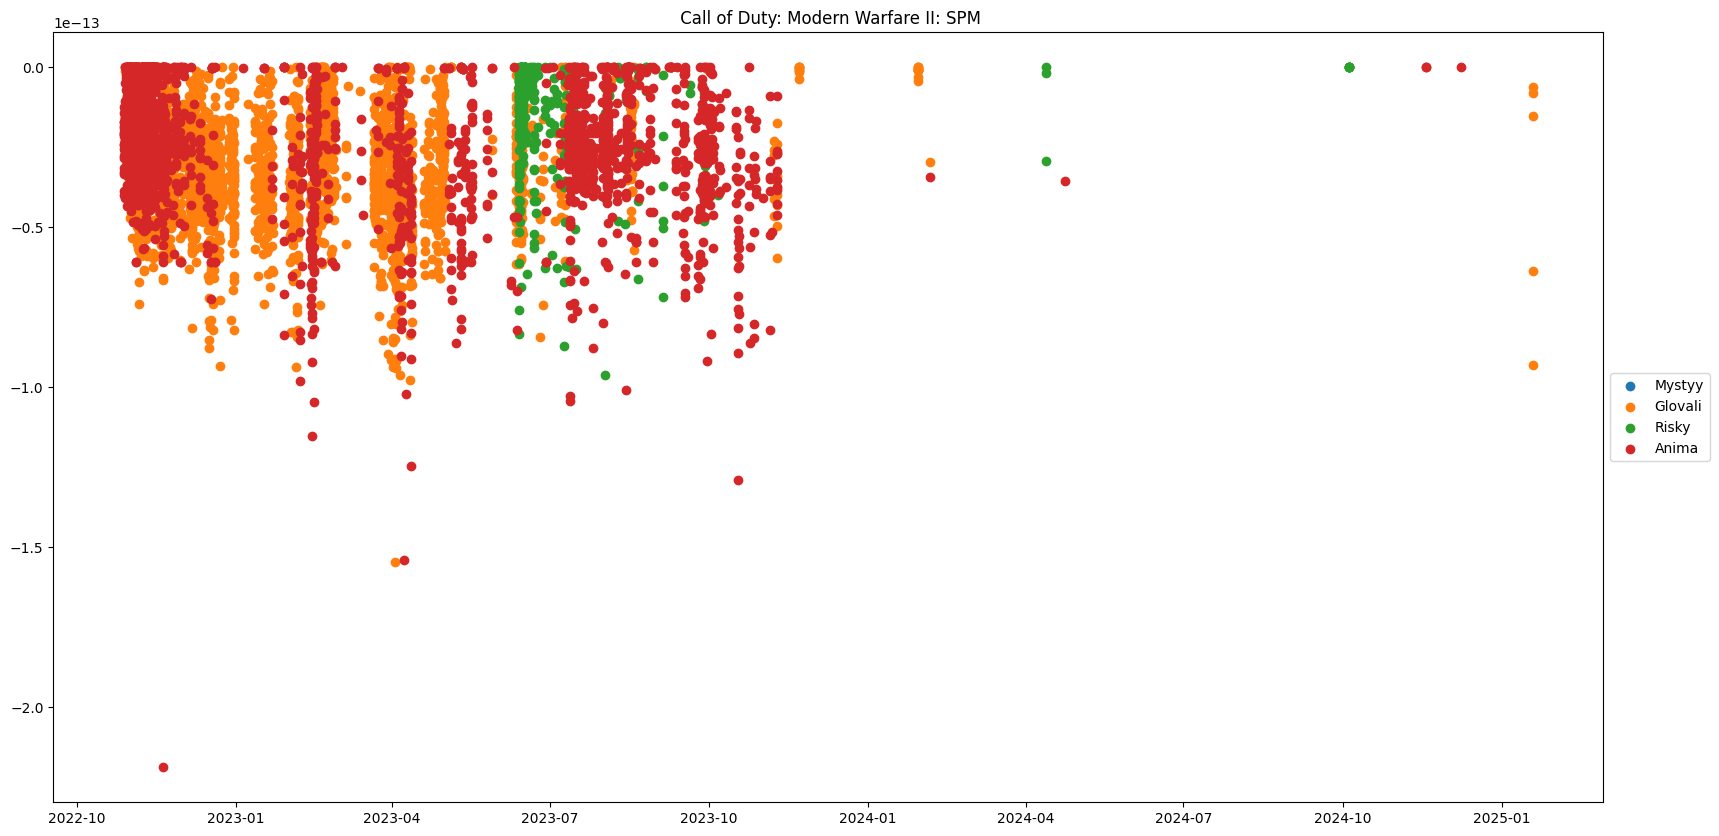

In [13]:
plot_game(game_name = ' Call of Duty: Modern Warfare II')

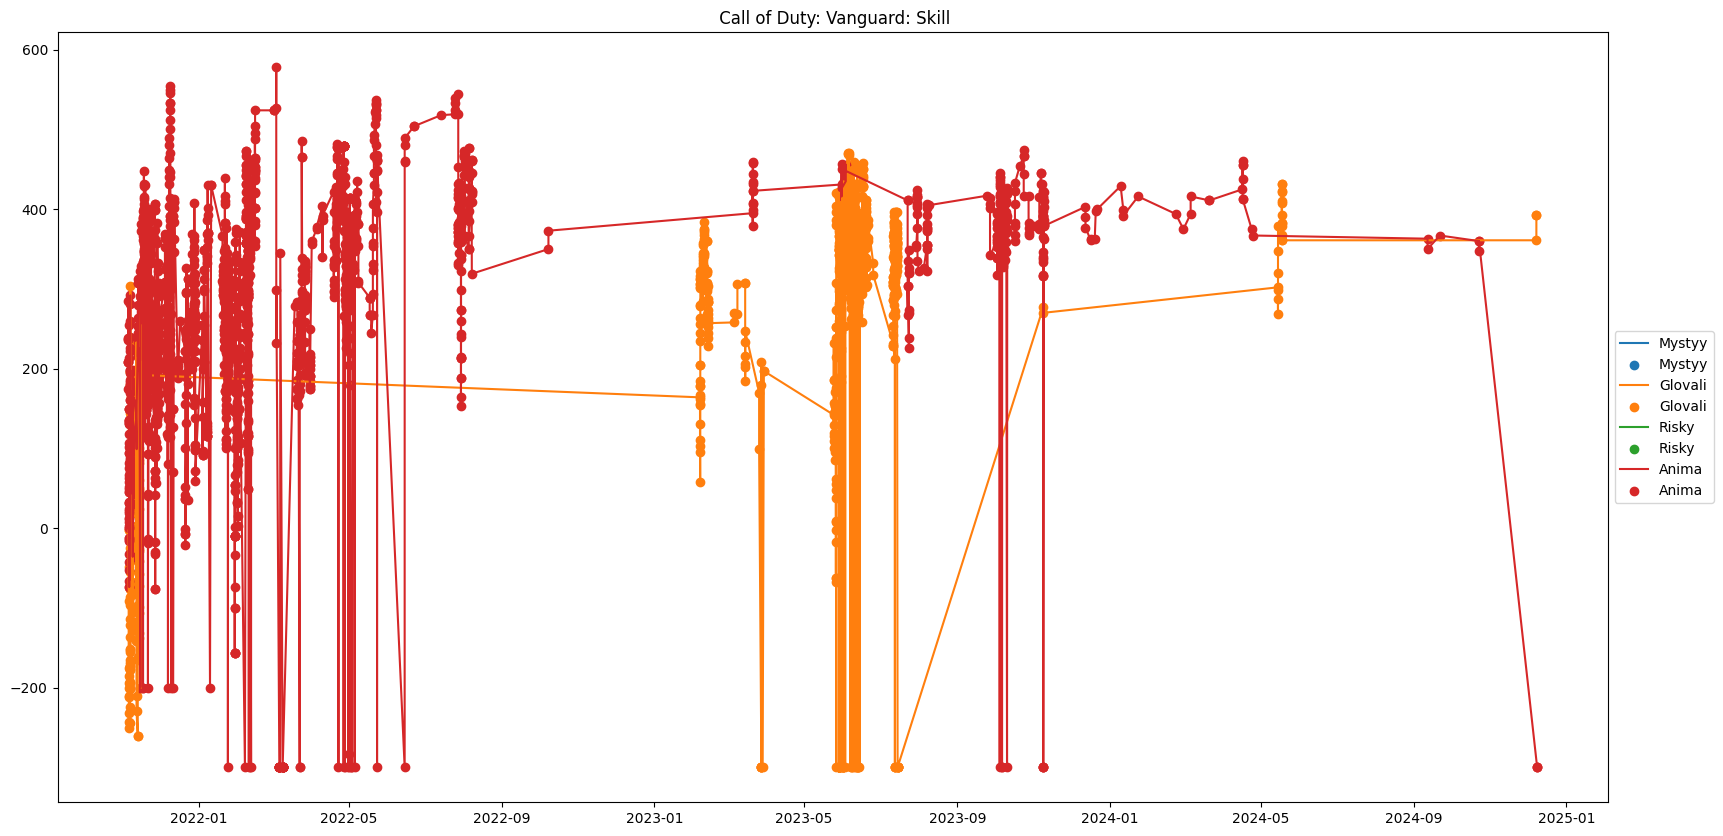

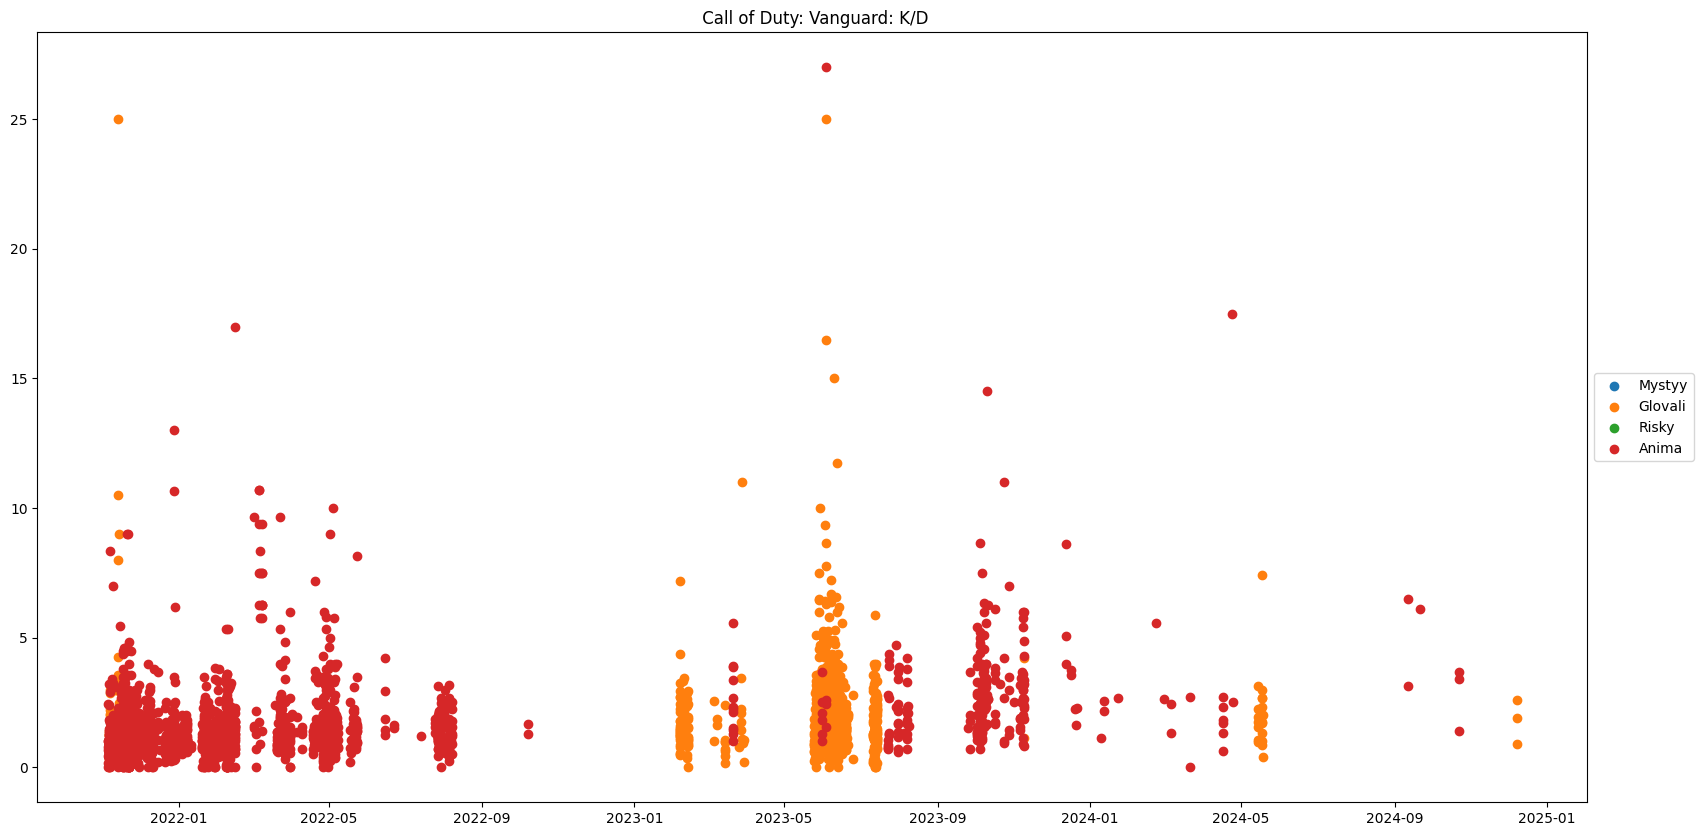

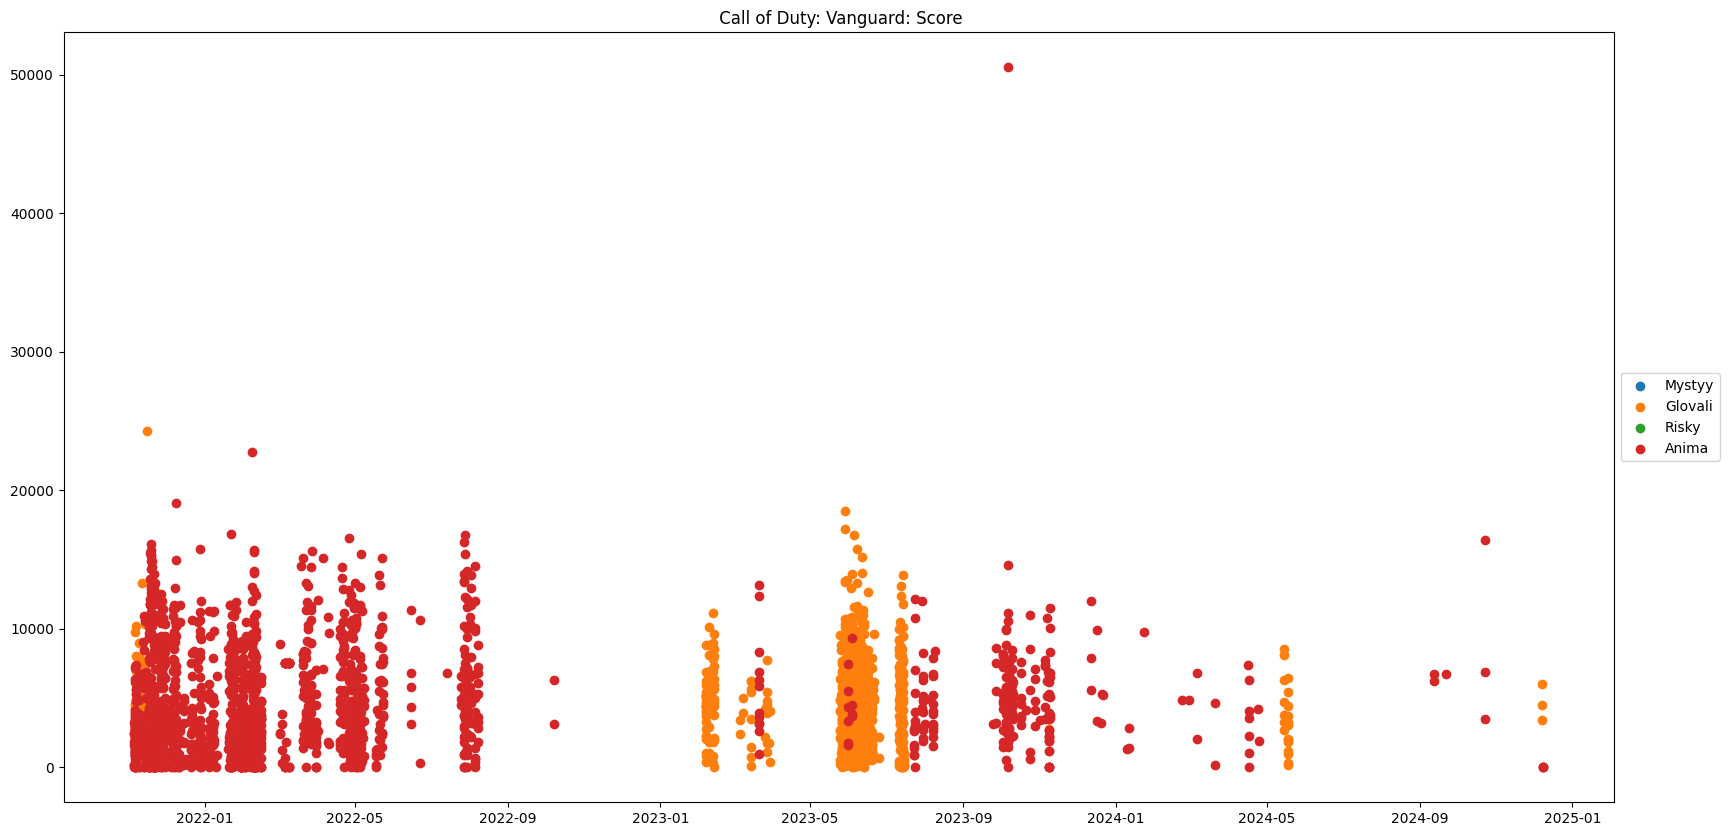

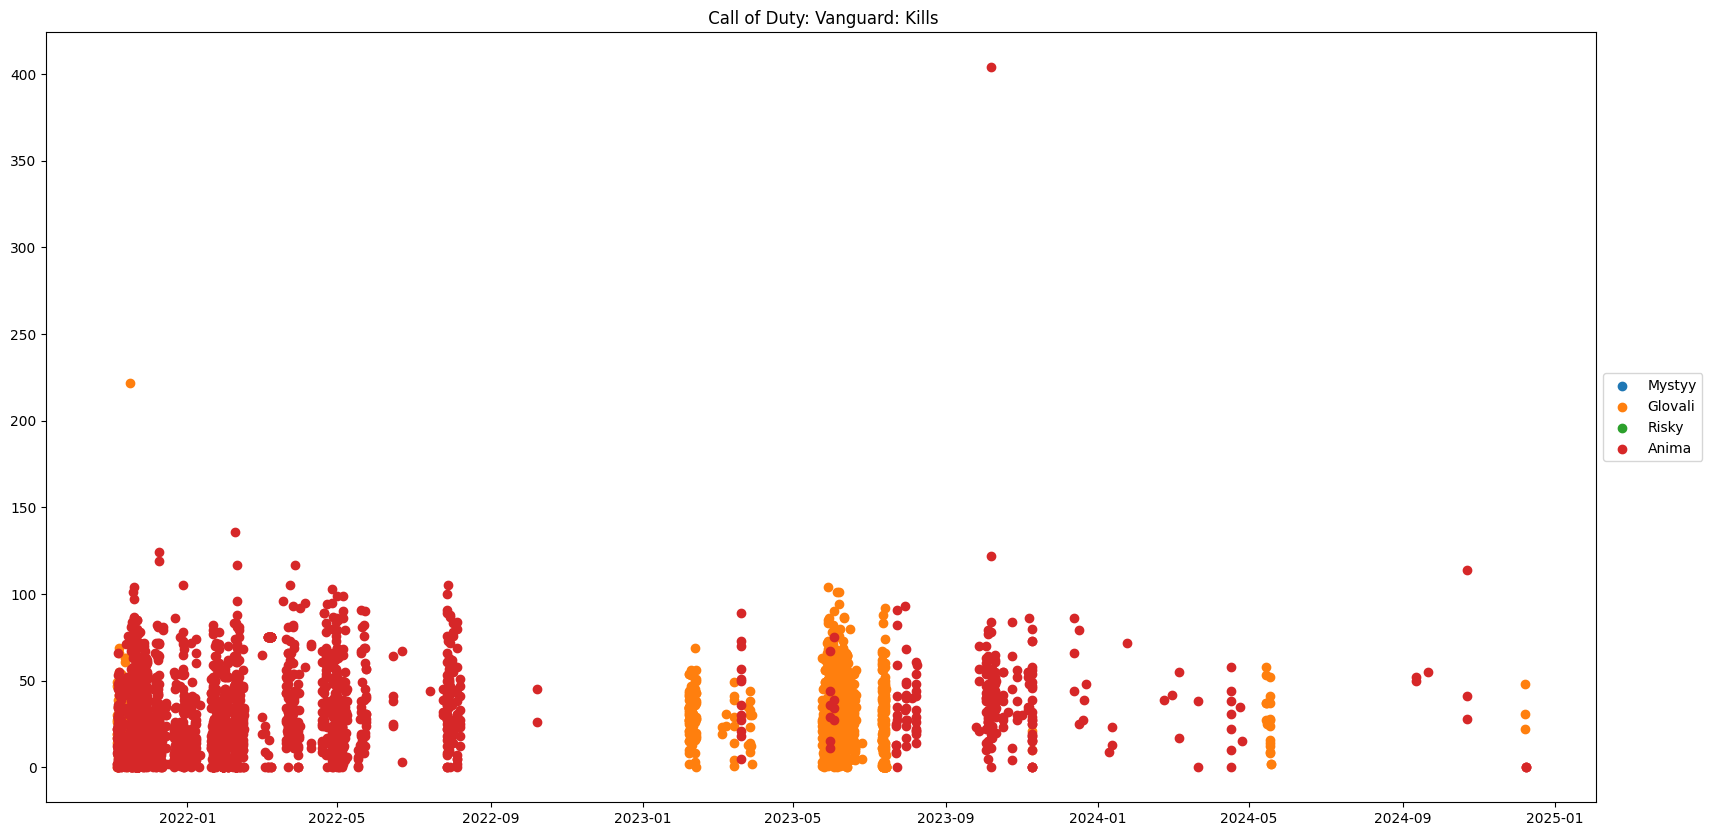

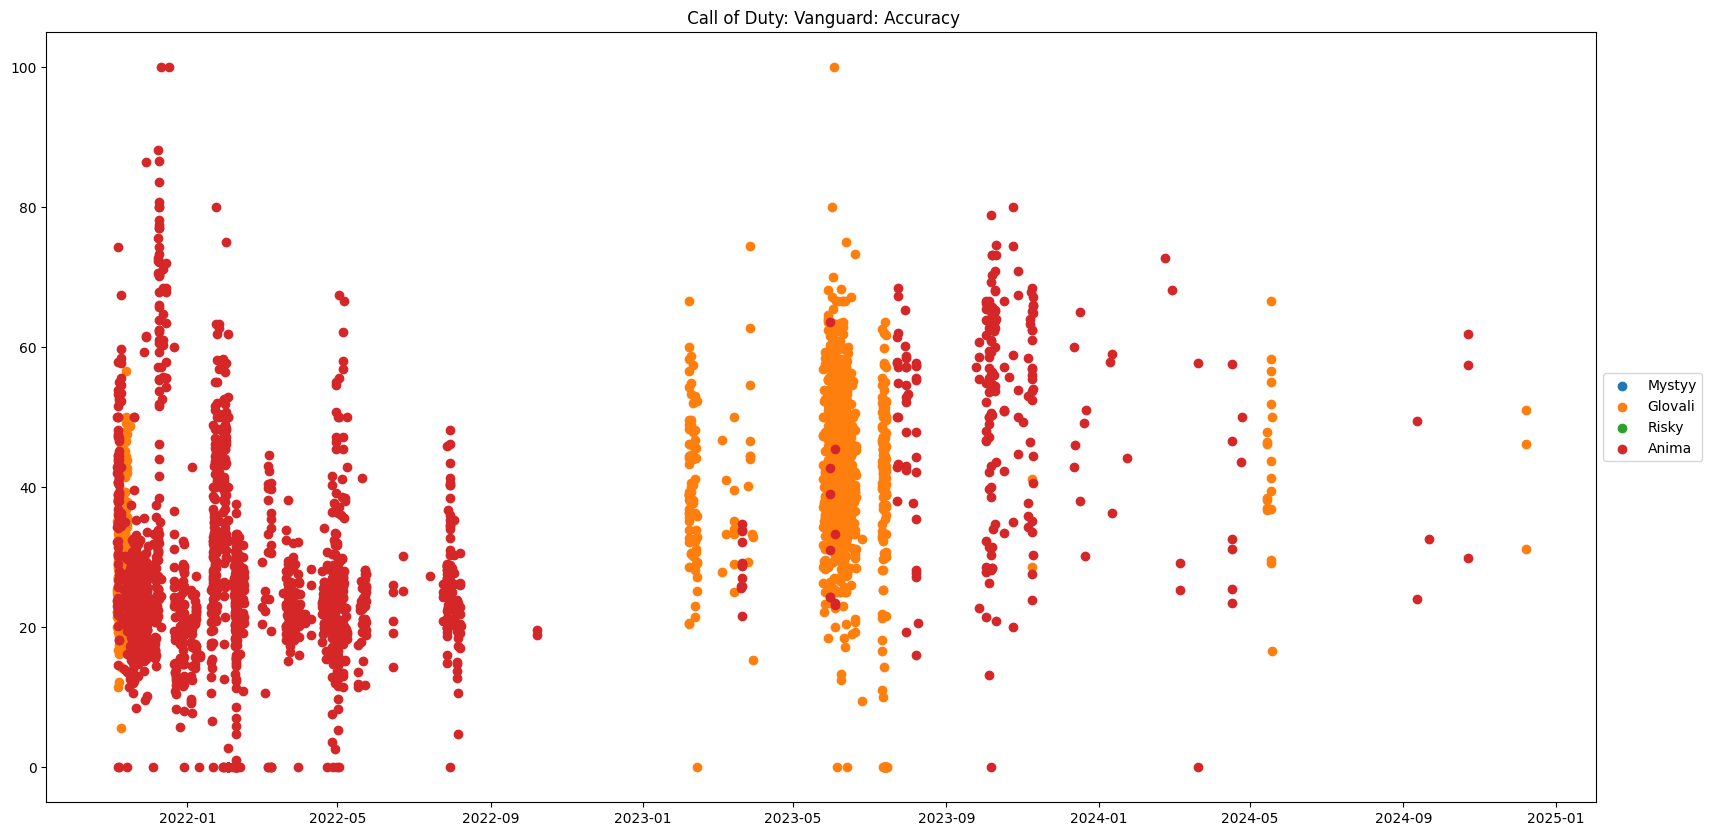

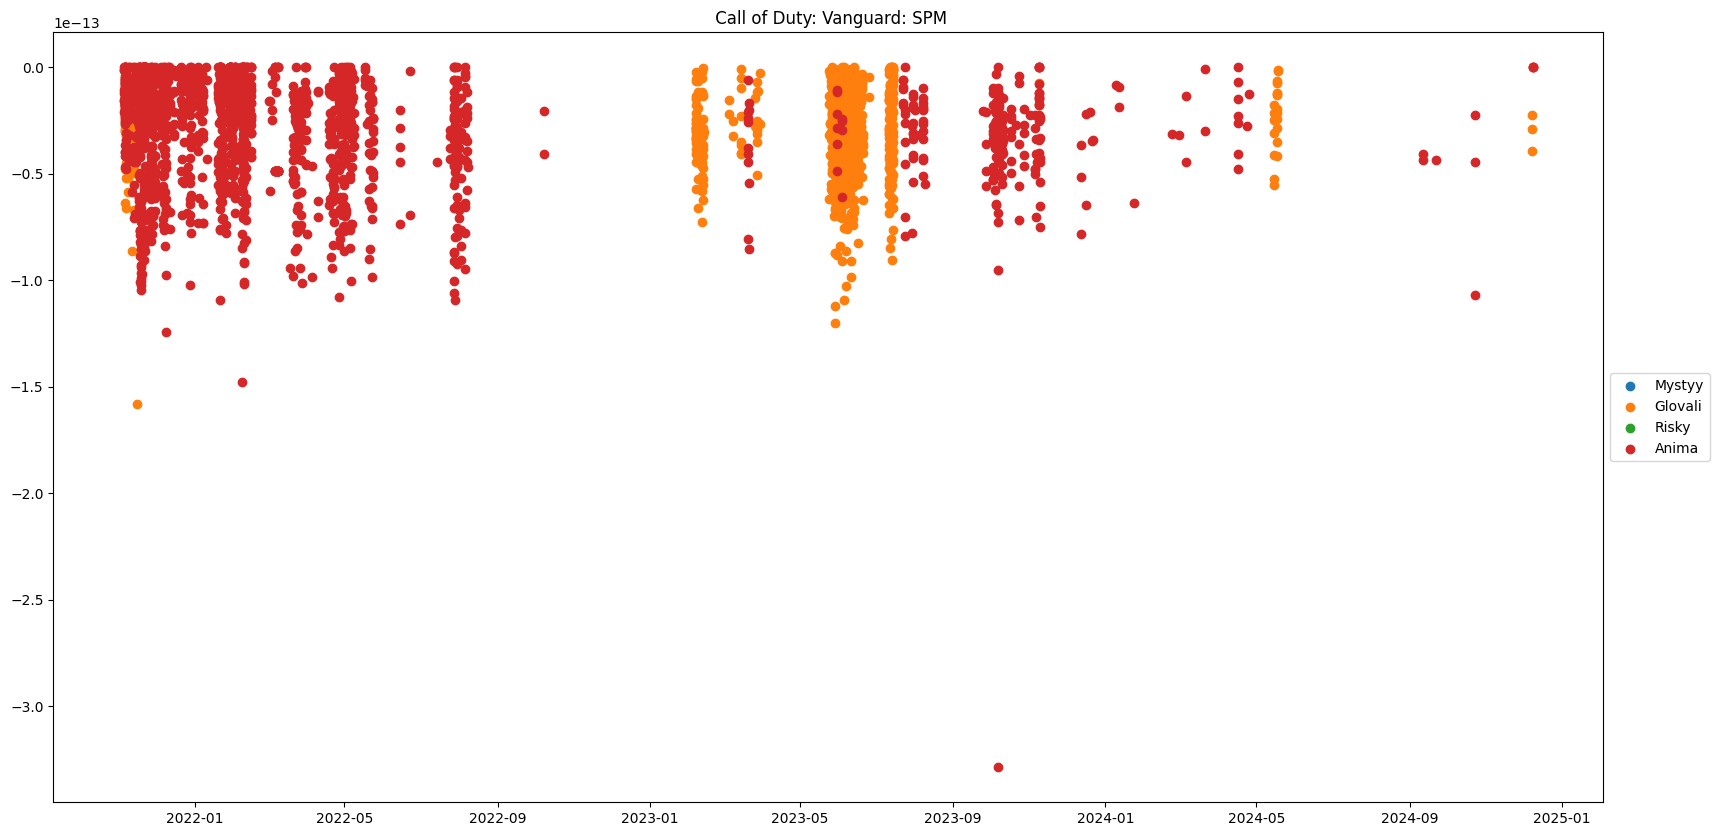

In [14]:
plot_game(game_name = ' Call of Duty: Vanguard')

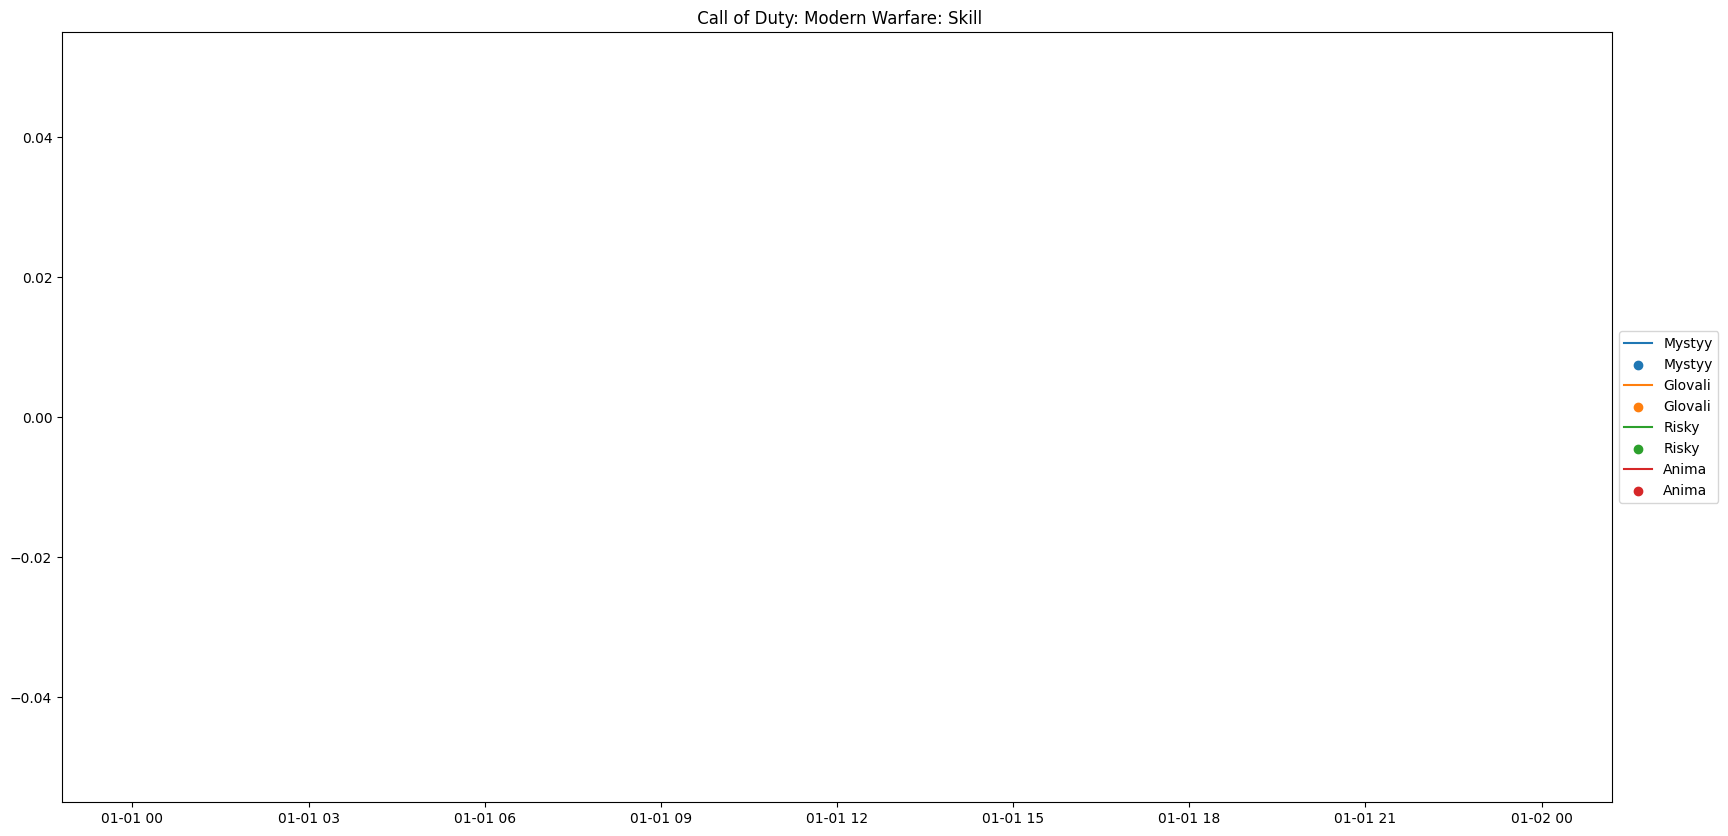

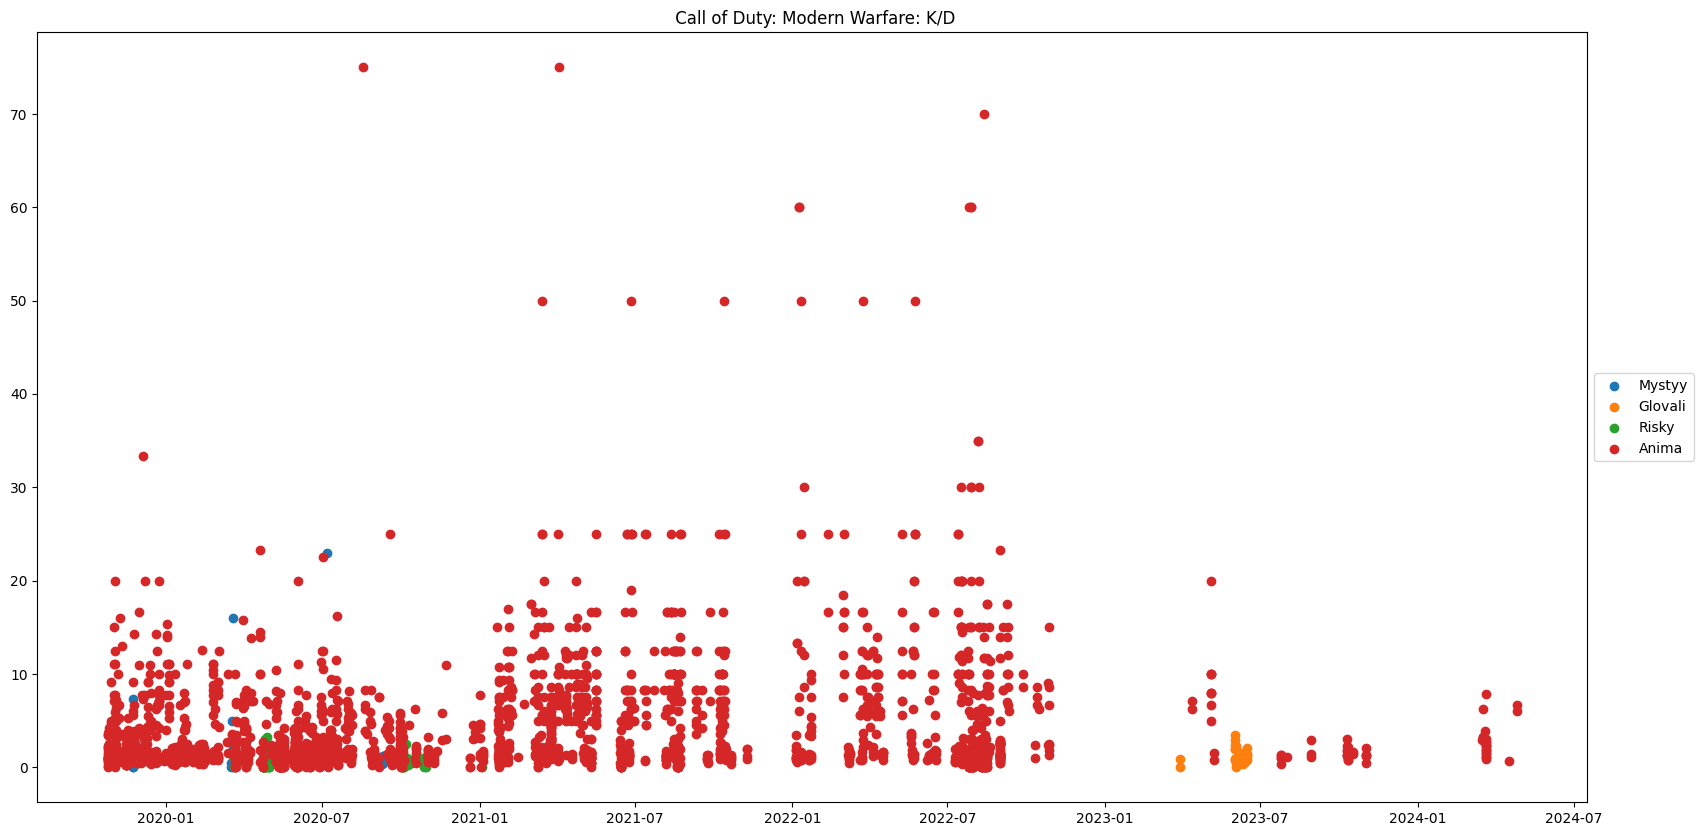

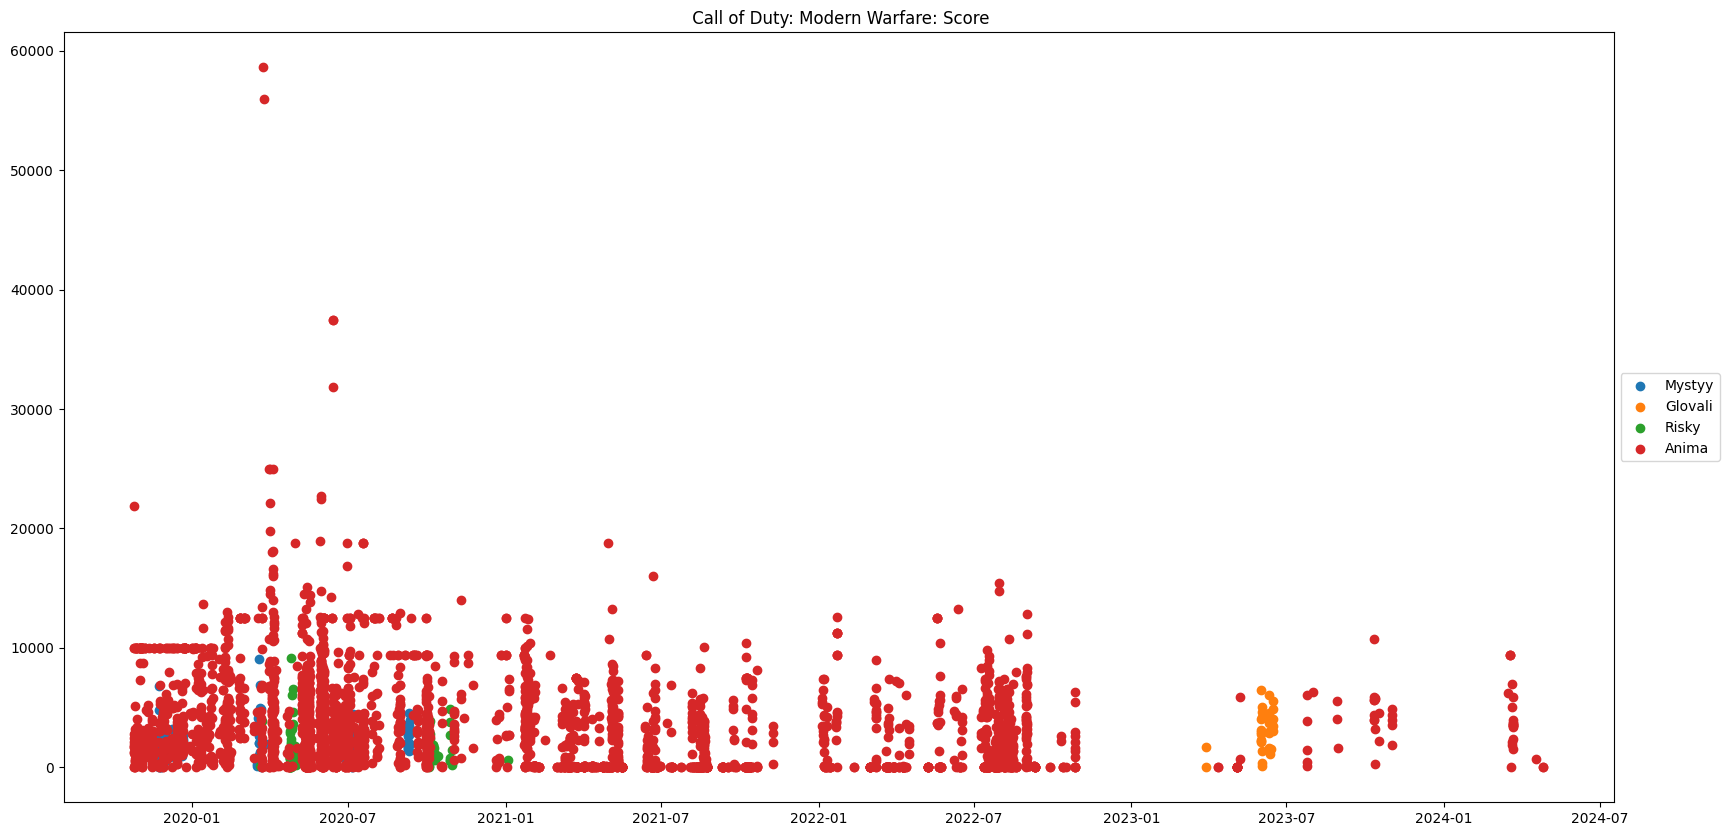

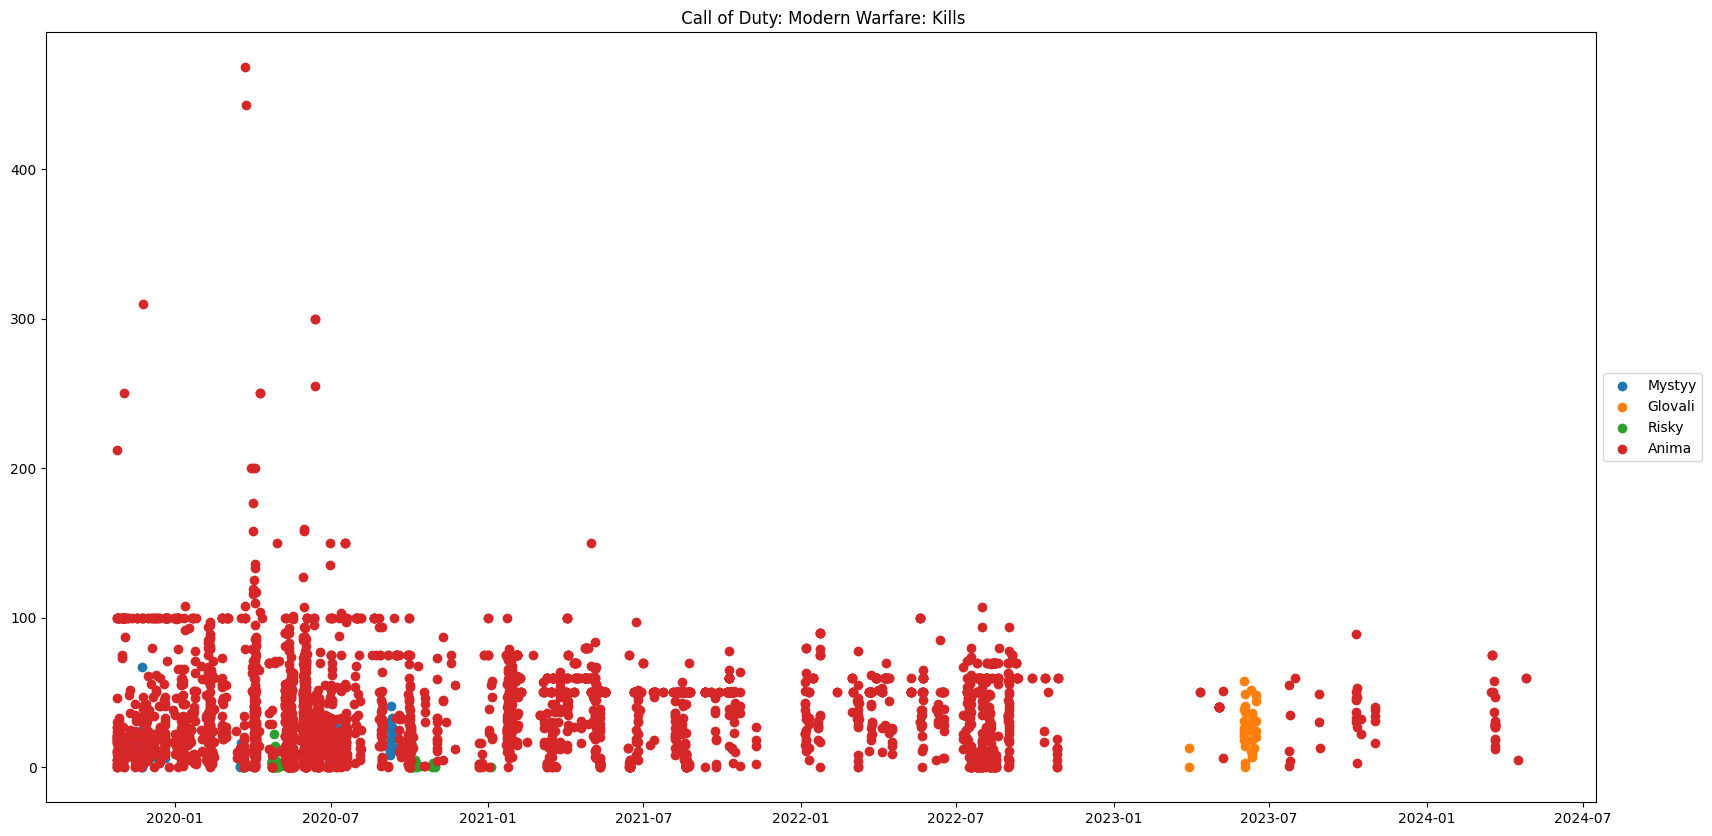

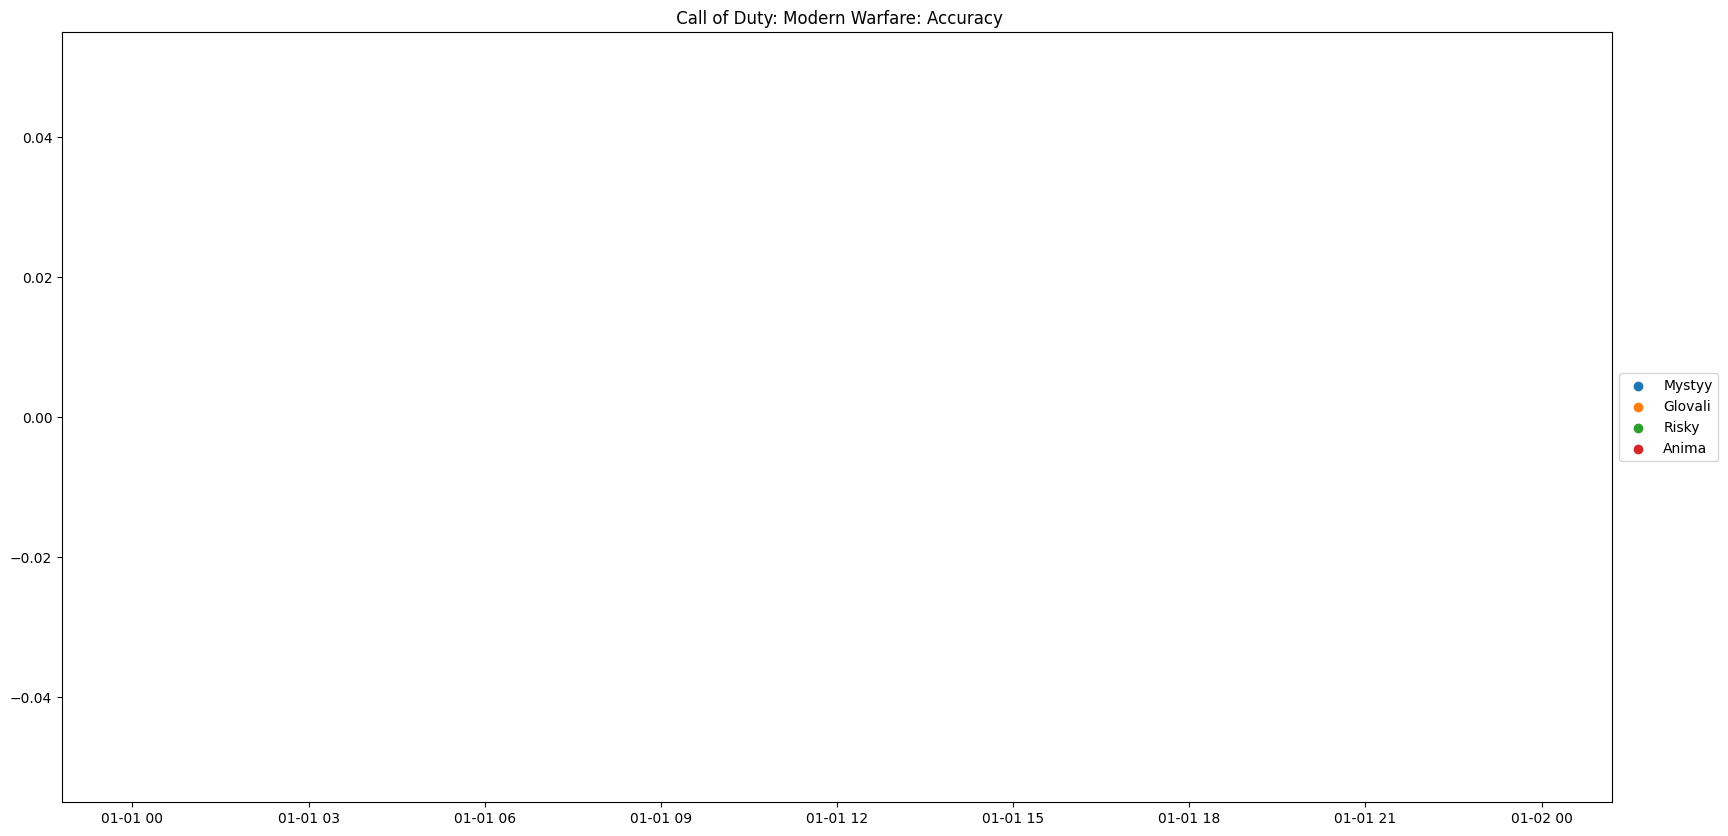

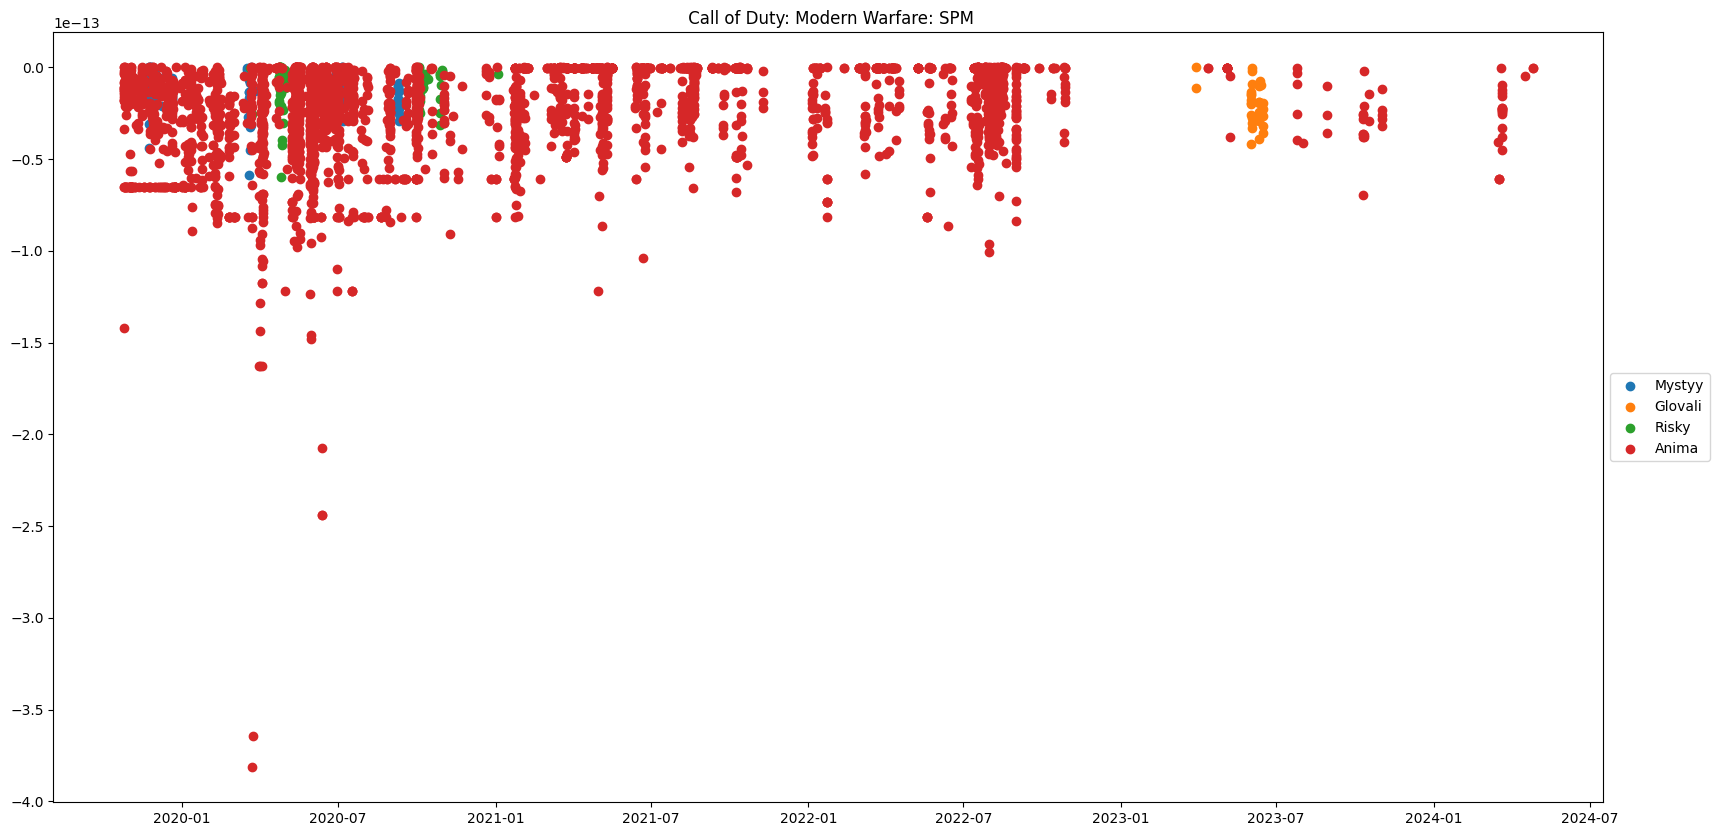

In [15]:
plot_game(game_name = ' Call of Duty: Modern Warfare')

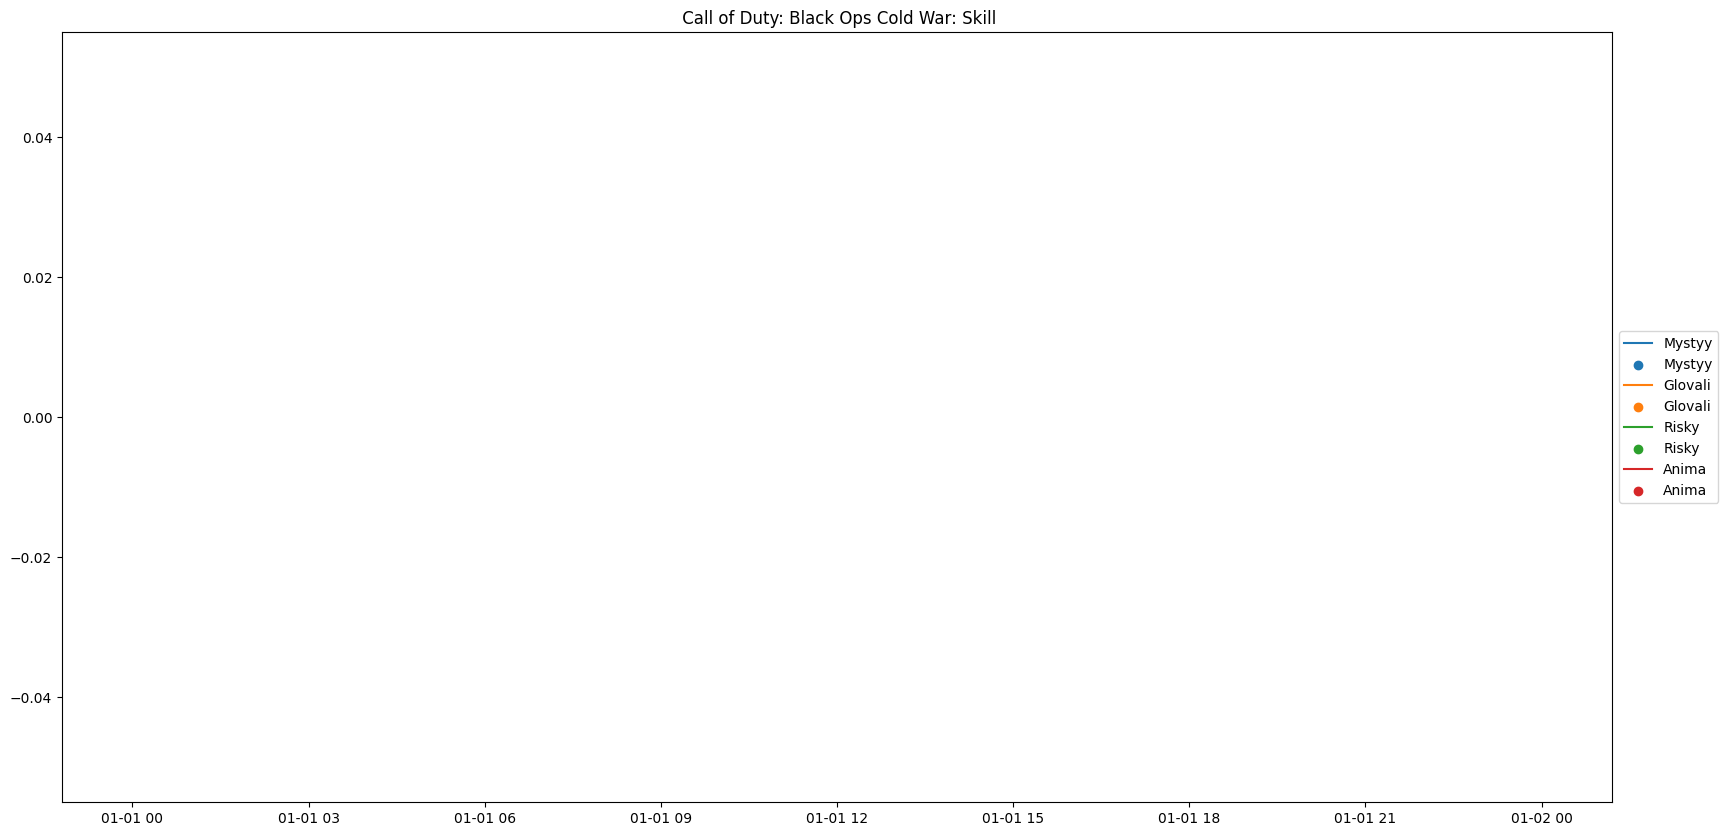

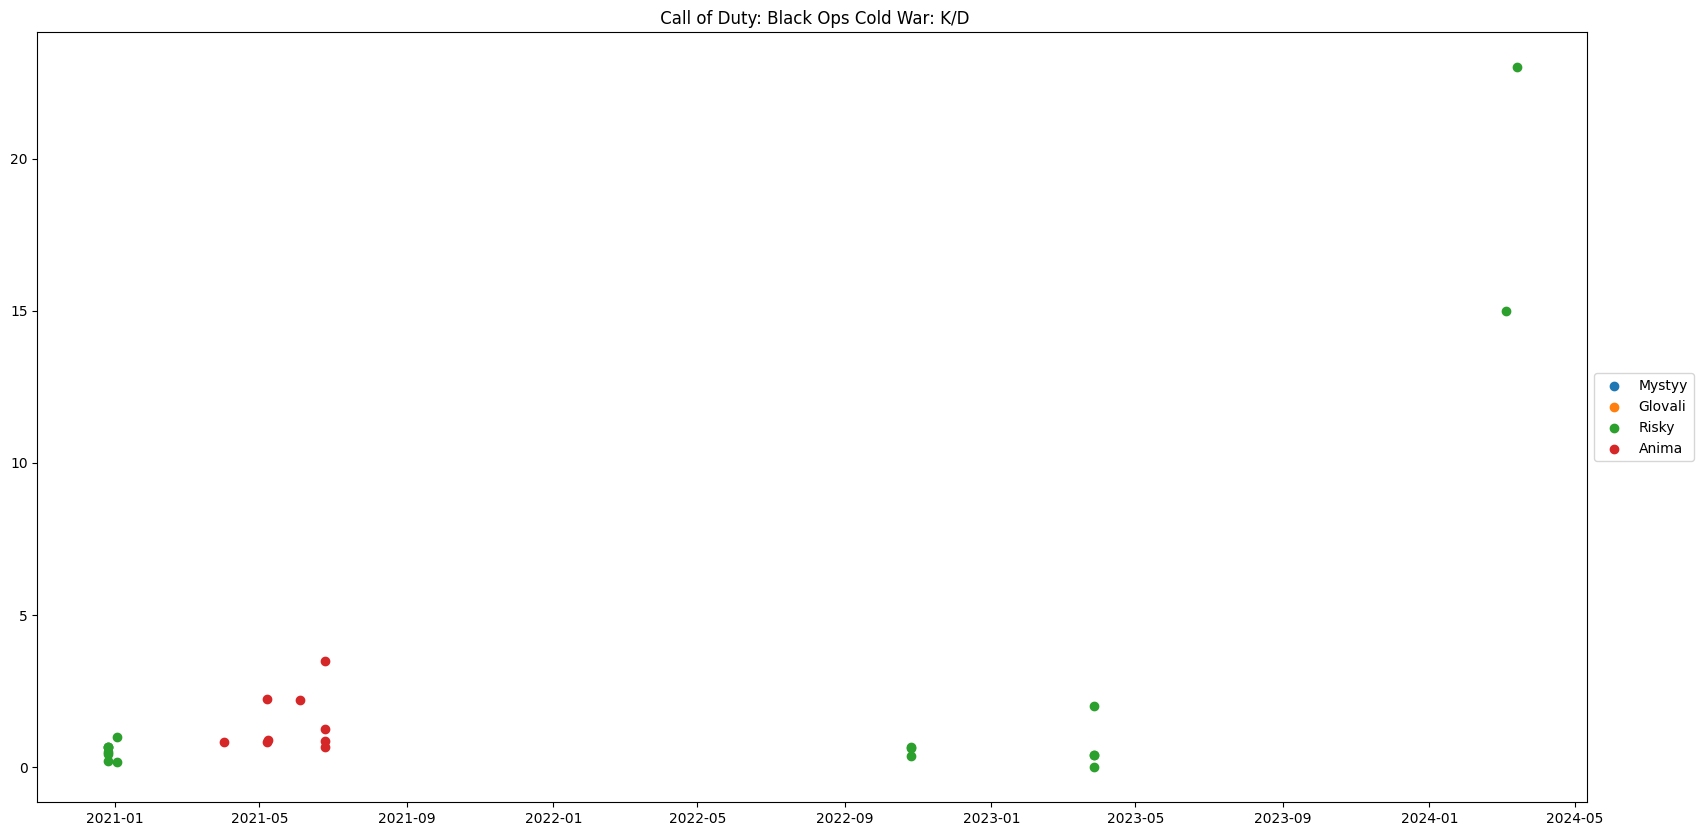

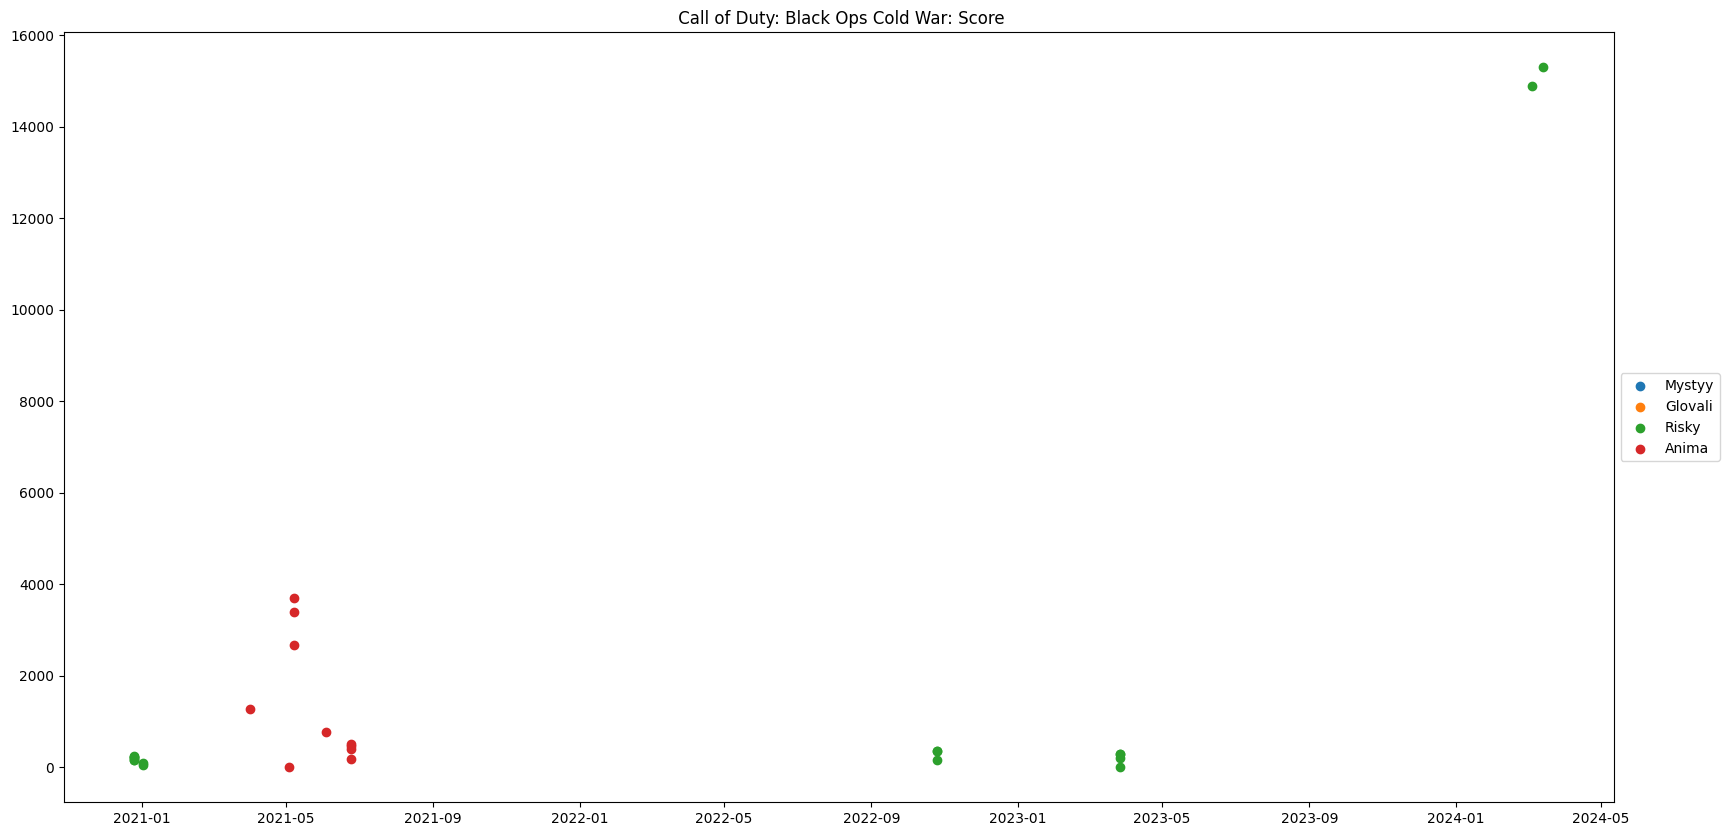

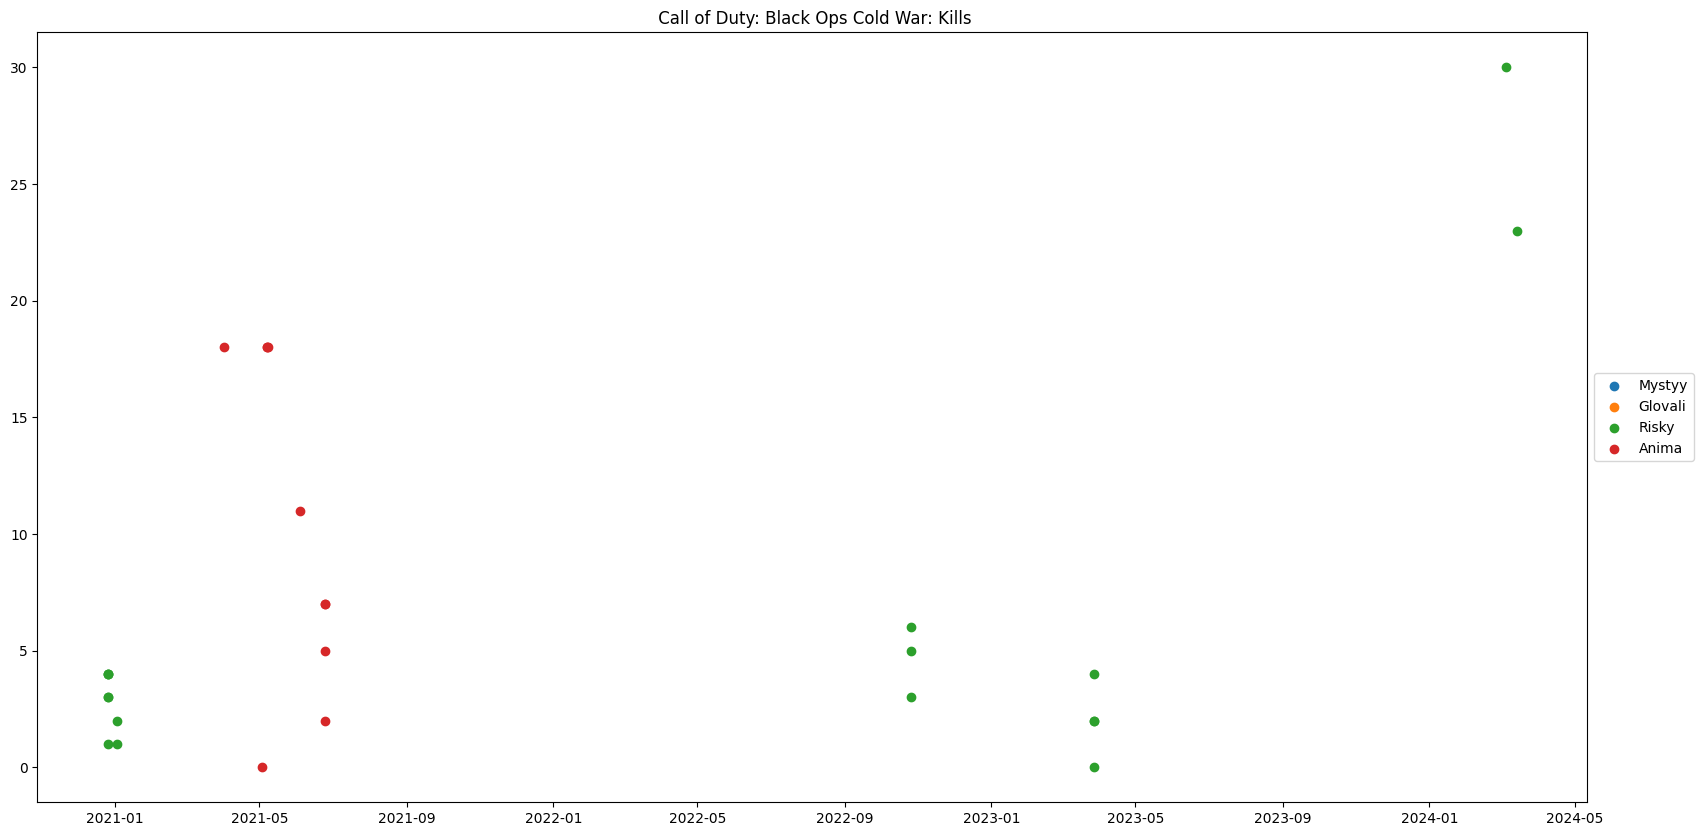

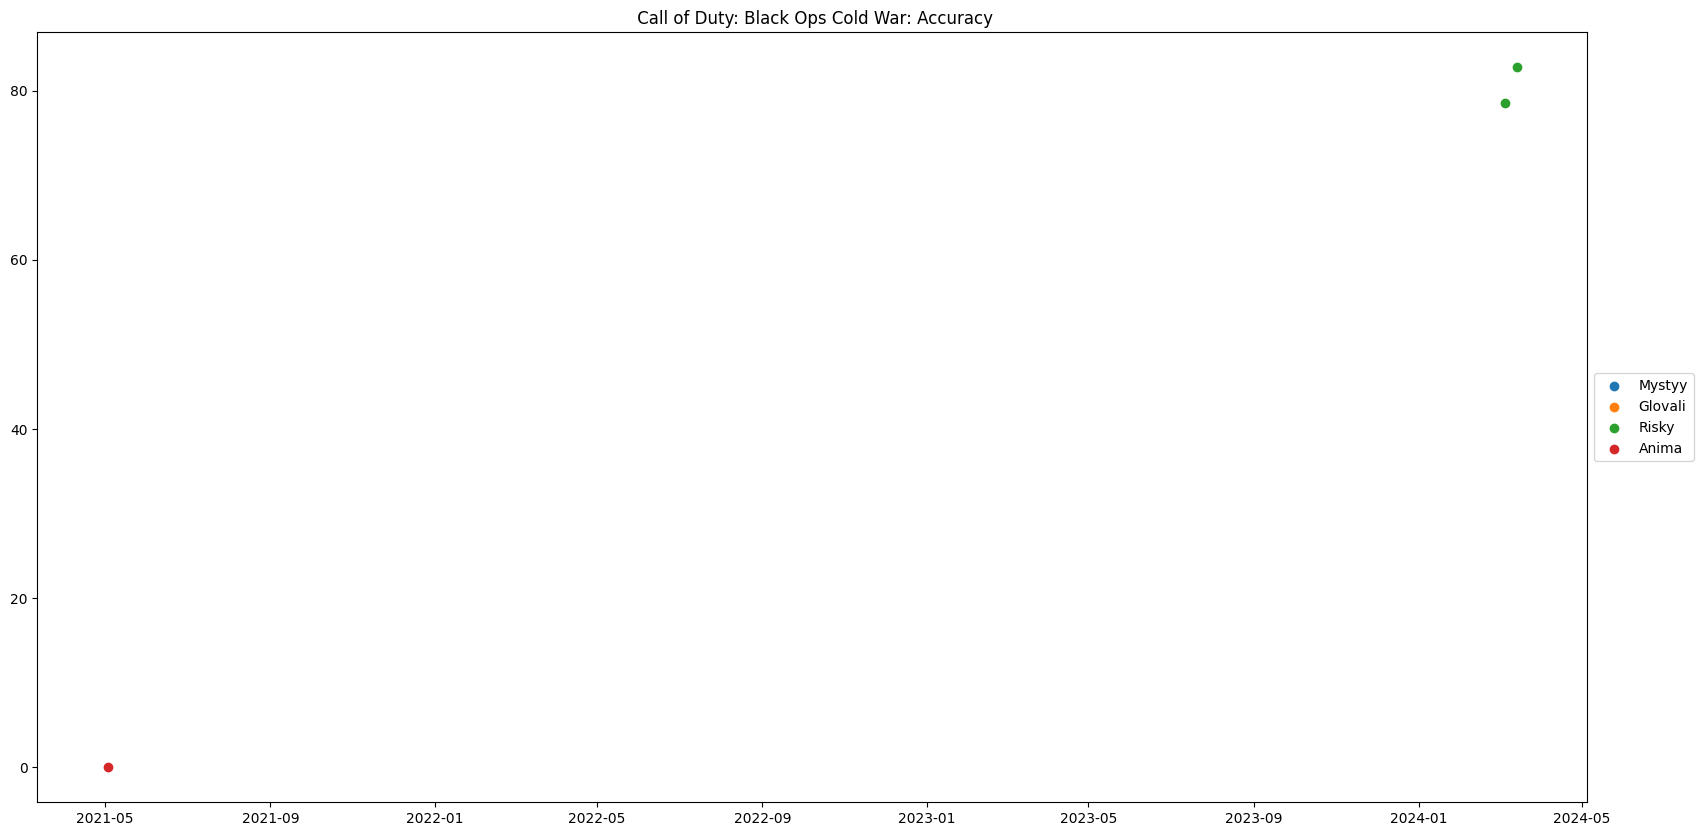

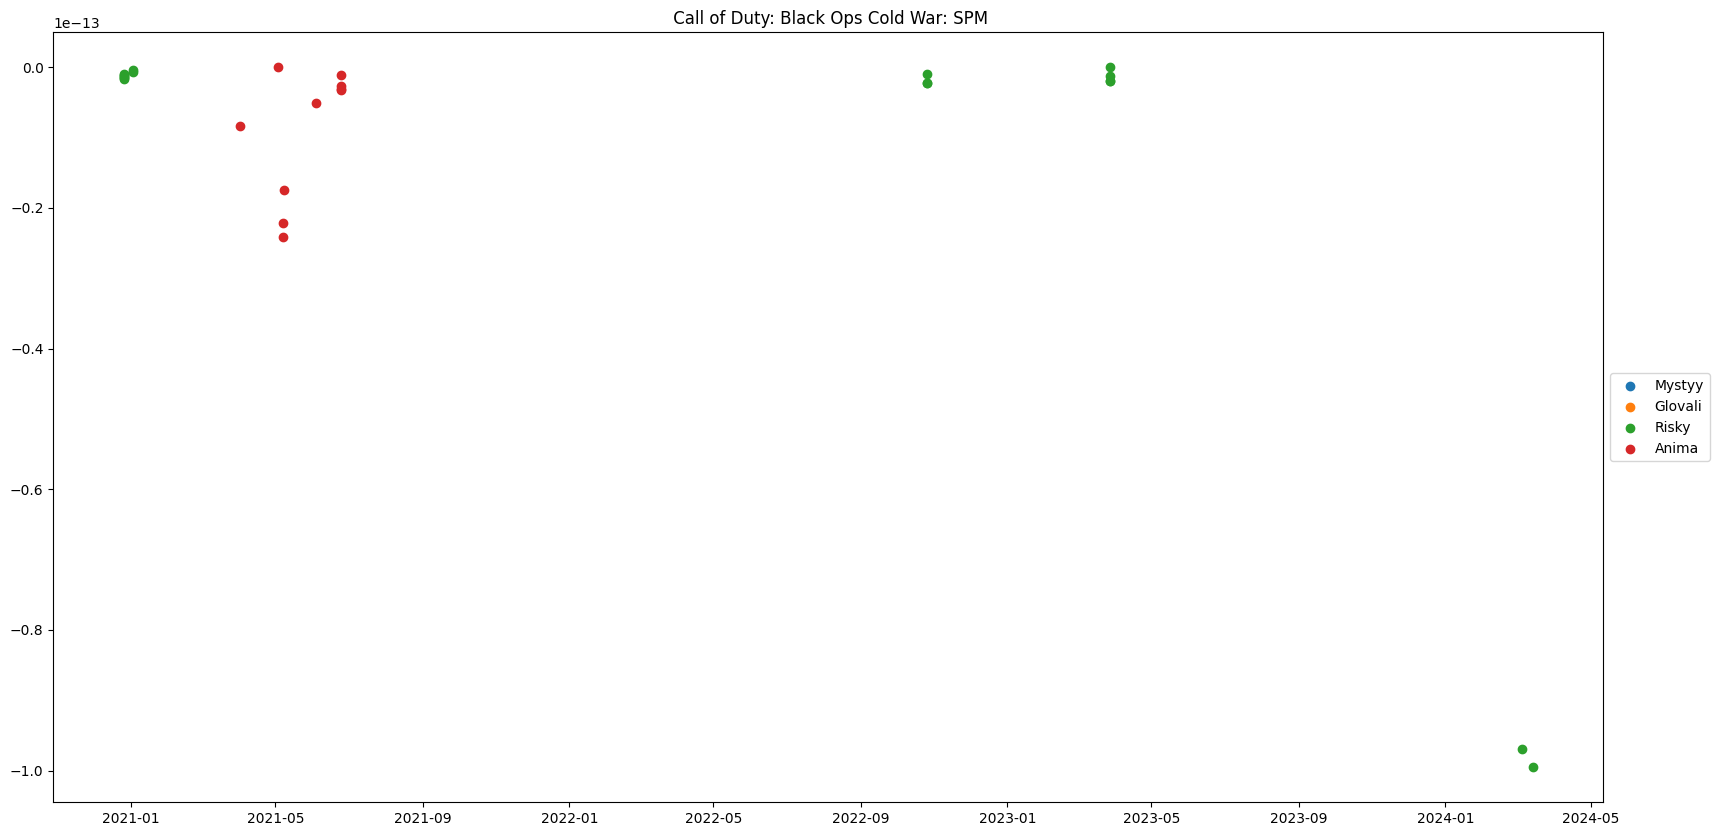

In [16]:
plot_game(game_name = ' Call of Duty: Black Ops Cold War')